# **Customer LifeTime Value**

[Sumber Dataset Customer LifeTime Value](https://docs.google.com/document/d/1pEckO_D4vdUk_bIZX-lkmghmMX30WyPu/edit?usp=drive_link&ouid=116686943531344751554&rtpof=true&sd=true)

## **Business Understanding**

---

### **Context**

`Customer Lifetime Value`, atau `CLV`, adalah sebuah ukuran tentang seberapa berharganya seorang pelanggan bagi sebuah perusahaan. Dari nilai ini, perusahaan bisa menentukan berapa banyak keuntungan yang diperoleh dari satu pelanggan serta biaya yang dikeluarkan untuk mendapatkan atau mempertahankan pelanggan baru. Angka ini cukup penting bagi sebuah perusahaan untuk diketahui, terutama jika perusahaan ingin menargetkan pemasaran secara efektif kepada pelanggan yang bernilai tinggi, serta memahami bagaimana perubahan pelanggan perusahaan di masa depan.

### **Problem Statement**

Perusahaan saat ini belum memiliki metode prediksi Customer Lifetime Value (CLV) yang akurat dan efisien. Secara manual, manusia mungkin bisa menilai pelanggan bernilai tinggi atau rendah, tetapi metode ini rawan kelalaian dan tidak scalable, terutama jika jumlah pelanggan sangat besar, misalnya jutaan. Tanpa prediksi yang sistematis, perusahaan kesulitan menargetkan promosi atau program retensi secara efektif, dan sulit memahami perubahan perilaku pelanggan di masa depan. Project ini bertujuan membangun model regresi CLV berbasis machine learning untuk memprediksi nilai pelanggan secara tepat dan membantu perusahaan mengambil keputusan berbasis data.

### **Goals**

Tujuan dari proyek ini adalah membangun model prediksi untuk `Customer Lifetime Value (CLV)` berdasarkan data pelanggan yang sudah tersedia, seperti **Vehicle Class**, **Coverage**, **Employment Status**, **Income**, **Monthly Premium Auto**, hingga **Total Claim Amount** Dan masih banyak lagi. Dengan adanya model ini, perusahaan dapat:

1. Mengembangkan model regresi untuk memprediksi CLV setiap pelanggan.
2. Mengidentifikasi pelanggan dengan nilai CLV tinggi yang layak diprioritaskan dalam program retensi.
3. Mengoptimalkan strategi pemasaran dengan mengarahkan sumber daya pada pelanggan yang paling menguntungkan.
4. Mengurangi biaya akuisisi dengan fokus pada segmen pelanggan yang bernilai tinggi.
5. Memahami faktor faktor utama yang memengaruhi nilai pelanggan, sehingga mendukung pengambilan keputusan bisnis yang lebih tepat dan berorientasi jangka panjang.



### **Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data pelanggan untuk menemukan pola dari fitur fitur yang ada, yang membedakan satu pelanggan dengan pelanggan lainnya dalam hal nilai seumur hidup (Customer Lifetime Value).

Selanjutnya, kita akan membangun suatu model regresi yang dapat membantu perusahaan dalam memprediksi nilai CLV dari pelanggan baru maupun pelanggan yang sudah ada. Hasil prediksi ini dapat menjadi tool bagi perusahaan untuk mengidentifikasi pelanggan bernilai tinggi, merancang strategi retensi yang lebih efektif, serta mengoptimalkan alokasi biaya pemasaran.


### **Metric Evaluation**

Dalam mengevaluasi performa model regresi yang dibangun, akan digunakan beberapa metrik, yaitu **Root Mean Squared Error** (RMSE), **Mean Absolute Error** (MAE), dan **Mean Absolute Percentage Error** (MAPE). **RMSE** mengukur rata rata akar kuadrat dari selisih antara nilai aktual dan prediksi, sedangkan **MAE** menghitung rata rata selisih absolutnya. **MAPE** digunakan untuk melihat seberapa besar rata rata kesalahan model dalam bentuk persentase terhadap nilai aktual. Semakin kecil nilai dari ketiga metrik ini, semakin baik pula kemampuan model dalam melakukan prediksi.

Selain itu, apabila model linear dipilih sebagai model akhir, evaluasi juga akan mempertimbangkan **R-squared** dan **Adjusted R-squared**. Nilai ini menunjukkan seberapa besar variasi data yang dapat dijelaskan oleh model. Semakin mendekati angka 1, semakin baik model dalam merepresentasikan data. Namun demikian, perlu dicatat bahwa metrik ini kurang relevan untuk model non linear, sehingga penggunaannya hanya bersifat opsional sesuai jenis algoritma yang dipakai.

---

## **Data Understanding**

- Sumber data yang digunakan berasal dari _Insurance Dataset (Customer Lifetime Value)_ 
- Dataset berisi informasi pelanggan asuransi kendaraan dengan 11 fitur, dimana setiap baris merepresentasikan profil individual pelanggan yang mencakup karakteristik demografis (status pekerjaan, perkawinan, pendidikan), jenis kendaraan yang dimiliki, data finansial, dst yang menjadi acuan untuk memprediksi _Customer Lifetime Value (CLV)_ sebagai estimasi nilai kontribusi pelanggan terhadap perusahaan asuransi dalam jangka panjang.



**Attribute Information**

| Fitur                   | Tipe Data   | Deskripsi                                                                  |
|--------------------------|-------------|---------------------------------------------------------------------------|
| Vehicle Class            | Object      | Jenis kendaraan yang dimiliki pelanggan.                                  |
| Coverage                 | Object      | Tingkat cakupan polis.                                                    |
| Renew Offer Type         | Object      | Jenis penawaran perpanjangan polis.                                       |
| Employment Status        | Object      | Status pekerjaan pelanggan.                                               |
| Marital Status           | Object      | Status perkawinan.                                                        |
| Education                | Object      | Tingkat pendidikan pelanggan.                                             |
| Number of Policies       | Integer     | Jumlah polis aktif yang dimiliki pelanggan.                               |
| Monthly Premium Auto     | Integer     | Premi bulanan yang dibayar pelanggan untuk asuransi mobil.                |
| Total Claim Amount       | Float       | Total nilai klaim yang pernah diajukan pelanggan.                         |
| Income                   | Integer     | Pendapatan tahunan pelanggan.                                             |
| Customer Lifetime Value  | Float       | Estimasi nilai seumur hidup pelanggan (variabel target untuk regresi).    |

In [1]:
# Import Library yang dibutuhkan

# --- Data Manipulation dan Analisis ---
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import f_oneway

# --- Visualisasi ---
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# --- Statstik Test dan Multi-Kolinearitas ---
from statsmodels.stats.outliers_influence import variance_inflation_factor

# --- Machine Learning Models ---
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# --- Data Preprocessing ---
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

# --- Hyperparameter Tuning ---
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# --- Model Evaluation ---
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

# --- Feature Selection ---
from sklearn.feature_selection import SelectKBest, f_regression, RFE

# --- Pipeline ---
from sklearn.pipeline import Pipeline

# --- Warnings! ---
import warnings
warnings.filterwarnings('ignore')

# Konfigurasi 
np.random.seed(42)
import time

In [2]:
# Csv File Path
file_path = 'Dataset/data_customer_lifetime_value.csv'

# Load Dataset
df = pd.read_csv(file_path)

# Menampilkan 5 baris teratas dan terbawah dari dataset
display(df.head(), df.tail())

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940
5668,Luxury SUV,Basic,Offer2,Employed,Divorced,College,1.0,199.0,161.615740,60184.0,7664.219255


In [3]:
# Melihat informasi singkat dataset
df.info()
print(f'Jumlah baris dan kolom: {df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB
Jumlah baris dan kolom: (5669, 11)


In [4]:
# Statistik deskriptif fitur numerik dan kategorikal
display(df.describe(), df.describe(include=['O']))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


**Insight**

Berdasarkan statistik deskriptif, mayoritas pelanggan hanya memiliki 1 - 2 polis dengan premi bulanan di bawah 110, dan nilai klaim yang cukup bervariasi. Nilai Customer Lifetime Value (CLV) rata rata sekitar 8.000, namun terdapat beberapa pelanggan dengan CLV sangat tinggi mencapai 83 Ribu +, menunjukkan adanya outlier. Pendapatan pelanggan juga sangat beragam, bahkan banyak yang berpendapatan nol. Untuk fitur kategorikal, sebagian besar pelanggan merupakan pemilik mobil Four-Door Car, memiliki coverage Basic, menerima Offer1, berstatus bekerja (Employed), sudah menikah, dan berpendidikan Bachelor.

## **Exploratory Data Analysis (EDA)**

---

### **Analisis Customer Lifetime Value (CLV)**


**Distribusi Customer LifeTime Value (CLV)**

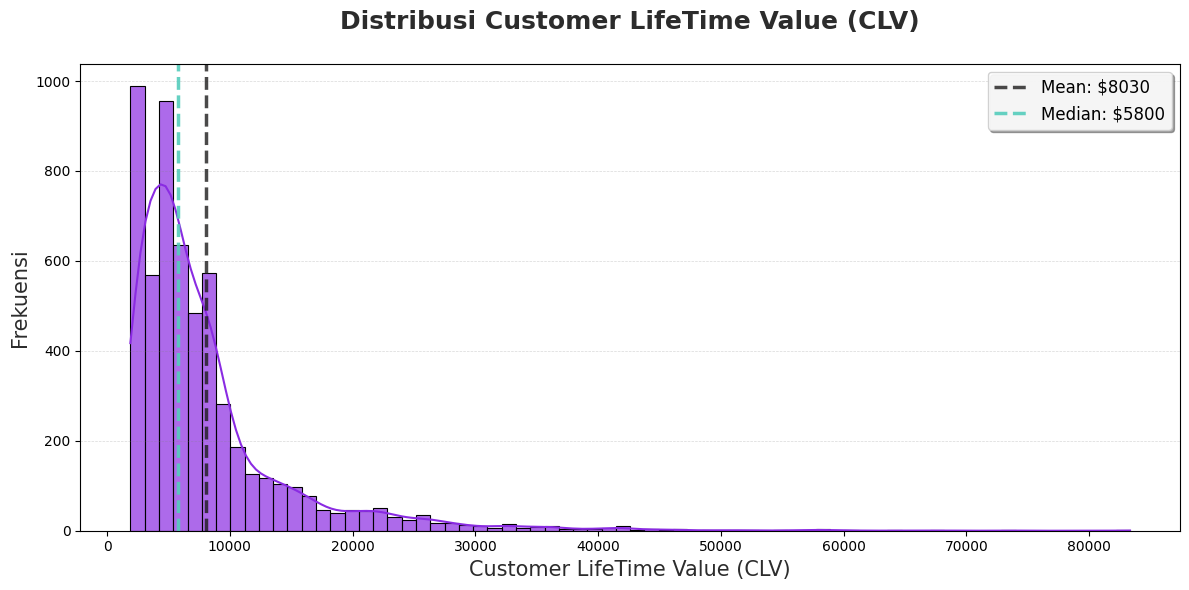

In [5]:
# Memvisualisasikan Distribusi Costumer LifeTime Value (CLV)

# Setup Figure
plt.figure(figsize=(12,6))

# Histogram
sns.histplot(
    df['Customer Lifetime Value'], 
    bins=70, 
    kde=True, 
    color='#8A2BE2',
    edgecolor='#000000',
    linewidth=0.8,
    alpha=0.7
)
plt.title('Distribusi Customer LifeTime Value (CLV)', 
          fontsize=18, pad=25, fontweight='bold', color='#2C2C2C')
plt.xlabel('Customer LifeTime Value (CLV)', fontsize=15, color='#2C2C2C')
plt.ylabel('Frekuensi', fontsize=15, color='#2C2C2C')

# Grid
plt.grid(axis='y', alpha=0.3, color='#808080', linestyle='--', linewidth=0.5)

# Mean Line
plt.axvline(df['Customer Lifetime Value'].mean(), 
           color="#1D1C1C", linestyle='--', linewidth=2.5, 
           label=f'Mean: ${df["Customer Lifetime Value"].mean():.0f}', alpha=0.8)
2
plt.axvline(df['Customer Lifetime Value'].median(),
           color="#54CCBC", linestyle='--', linewidth=2.5, 
           label=f'Median: ${df["Customer Lifetime Value"].median():.0f}', alpha=0.9)

plt.legend(fontsize=12, loc='upper right', framealpha=0.9, fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

**Insight**

Dari distribusi CLV di atas dapat disimpulkan bahwa:
- Distribusi `Customer Lifetime Value (CLV)` terlihat sangat **Right-skewed**, di mana sebagian besar pelanggan memiliki CLV di bawah 10.000, sementara hanya sedikit nasabah atau customer yang mencapai nilai jauh lebih tinggi.
- Seperti yang telah di singgung juga pada bagian Data Overview, perbedaan signifikan antara mean (8030) dan median (5800) mengindikasikan adanya outlier yang menarik distribusi ke kanan. Temuan ini menunjukkan bahwa perusahaan di dominasi oleh nasabah dengan nilai CLV rata rata rendah, tapi juga terdapat segmen kecil nasabah bernilai tinggi yang harus dan sangat penting di pertahankan oleh perusahaan.

**Analisis Segmentasi Pelanggan Berdasarkan Customer Lifetime Value (CLV)**


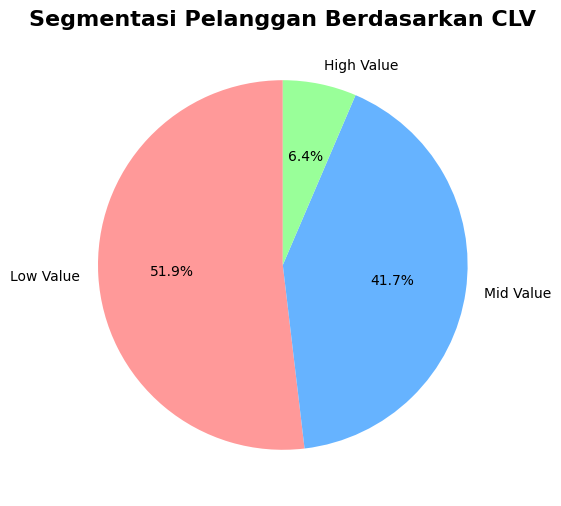

CLV Segment,Low Value,Mid Value,High Value
count,2941.000000,2363.000000,365.000000
mean,3987.711485,9889.470392,28560.769997
std,1182.094119,3286.772942,9296.503195
min,1898.007675,6005.027312,20003.140910
25%,2771.045031,7521.238618,22217.967960
50%,4061.590219,8663.363959,25640.240040
75%,5069.071361,11622.369755,32196.600370
max,5999.380228,19957.790340,83325.381190


In [6]:
# Analisis Segmentasi Pelanggan Berdasarkan CLV

# Menggunakan Threshold untuk segmentasi
df_segmented = df.copy()
low_threshold = 6000 # Batas bawah untuk segmen Low Value
high_threshold = 20000 # Batas atas untuk segmen High Value
df_segmented['CLV Segment'] = pd.cut(df_segmented['Customer Lifetime Value'],
                                     bins=[0,
                                           low_threshold,
                                           high_threshold,
                                           df_segmented['Customer Lifetime Value'].max()],
                                     labels=['Low Value', 'Mid Value', 'High Value'],
                                     include_lowest=True)

# Visualisasi Segmentasi CLV
plt.figure(figsize=(12, 6))
segment_counts = df_segmented['CLV Segment'].value_counts().sort_index()
colors = ['#ff9999', '#66b3ff', '#99ff99']
plt.pie(segment_counts.values, labels=segment_counts.index, 
        autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Segmentasi Pelanggan Berdasarkan CLV', fontsize=16, fontweight='bold')
plt.show()

# Summary statistik per segmentasi
df_segmented.groupby('CLV Segment')['Customer Lifetime Value'].describe().T

**Insight**

Kalau kita lihat dengan threshold 6.000 dan 20.00 yang aku buat:

- Mayoritas nasabah (51,9%) masuk kategori `Mid Value`, dengan CLV rata rata sekitar 9.800. Ini adalah segmen inti perusahaan karena jumlahnya besar dan nilainya cukup tinggi, sehingga bisa menjadi target utama untuk strategi retensi.
- Nasabah `Low Value` (41,7%) memiliki CLV rata rata hanya sekitar 4.000, jauh di bawah rata rata keseluruhan. Walaupun jumlahnya signifikan, kontribusi ke total pendapatan relatif kecil. Segmen ini bisa menjadi fokus upselling atau cross-selling agar berpindah ke Mid.
- Segmen `High Value` hanya 6,4%, namun memiliki CLV rata rata 28.500, lebih dari 3 kali lipat segmen Mid. Walaupun sedikit, mereka adalah kontributor paling bernilai sehingga penting dijaga loyalitasnya dengan layanan premium atau personalisasi.

**Hubungan Fitur Prediktor Numerik dengan CLV**

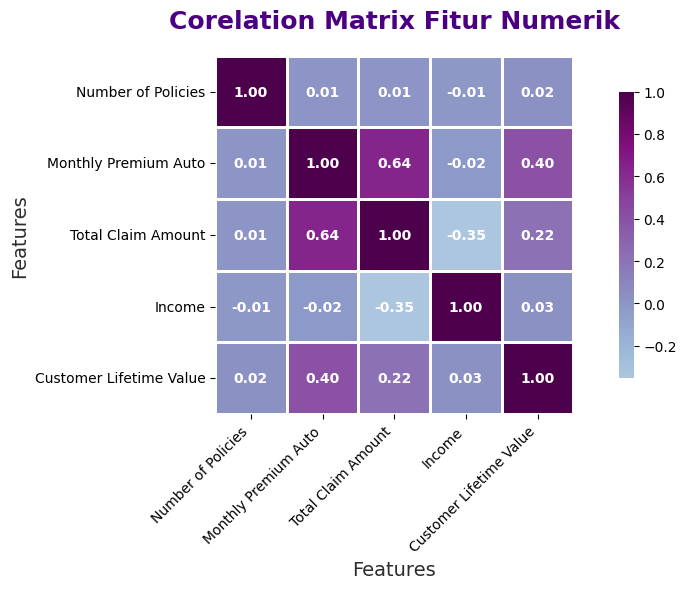

Korelasi Fitur Numerik dengan Customer Lifetime Value (CLV):

Monthly Premium Auto: 0.402
Total Claim Amount: 0.215
Income: 0.026
Number of Policies: 0.025


In [7]:
# variable untuk menyimpan fitur numerik
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
correlation_matrix = df[numerical_features].corr()

# Heatmap Korelasi Fitur Numerik
plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='BuPu',
            square=True,
            linecolor='white',
            linewidths=0.8,
            center=0,
            cbar_kws={"shrink": .8},
            fmt='.2f',
            annot_kws={'size': 10, 'weight': 'bold', 'color': '#FFFFFF'})

plt.title('Corelation Matrix Fitur Numerik', 
          fontsize=18, pad=20, fontweight='bold',color='#4B0082')
plt.xlabel('Features', fontsize=14, color='#2C2C2C')
plt.ylabel('Features', fontsize=14, color='#2C2C2C')

# Rotasi Label agar enak di baca
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# Menampilkan korelasi fitur numerik dengan CLV secara ekplisit
print('Korelasi Fitur Numerik dengan Customer Lifetime Value (CLV):\n')
clv_correlations = correlation_matrix['Customer Lifetime Value'].drop('Customer Lifetime Value').sort_values(ascending=False)
for feature, corr in clv_correlations.items():
    print(f'{feature}: {corr:.3f}')

**Insight**

Kalau kita lihat dari korelasi di atas, kita menemukan bahwa:

- **Monthly Premium Auto** punya hubungan paling kuat dengan CLV (0.40). Ini menarik, karena dari data kelihatan nasabah dengan premi bulanan lebih tinggi cenderung punya CLV lebih besar. Hal ini bisa jadi logis, karena premi yang tinggi biasanya datang dari produk dengan nilai perlindungan yang lebih mahal, layanan cepat dan masih banyak lagi.
- **Total Claim Amount** juga punya kaitan dengan CLV, meskipun tidak sekuat premi bulanan. Bisa jadi masuk akal, karena makin besar klaimnya, berarti pelanggan cukup aktif menggunakan layanan, yang akhirnya tercermin dalam CLV. Claim besar pelangganpun senang.
- Jika pada bisnis lain **Income** ini adalah fitur yang sangat penting tapi ternyata beda urusan nya jikalau dalam bidang asuransi, Income dan **Number of Policies** nyaris tidak berkorelasi dengan CLV. Ini agak menarik, karena ternyata gaji tinggi atau punya banyak polis tidak otomatis membuat nasabah lebih bernilai jangka panjang.


**Memvisualisasikan Fitur Prediktor Numerik Yang Berkorelasi Paling Tinggi dengan CLV**

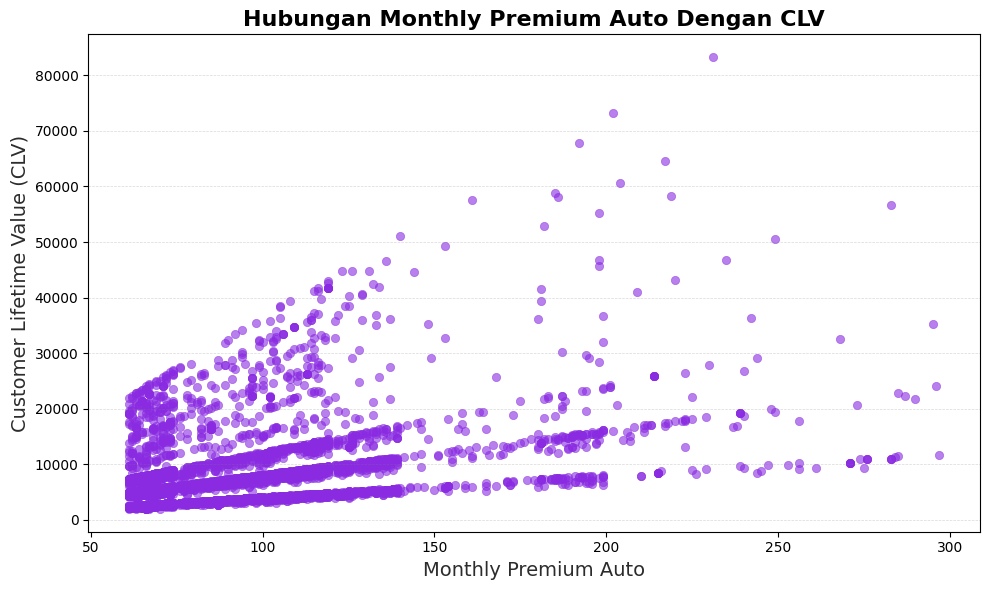

In [8]:
# Memvisualisasikan Monthly Premium Auto vs Customer Lifetime Value (CLV)

# Setup Figure
plt.figure(figsize=(10, 6))

# Scatter Plot
sns.scatterplot(data=df,
                x='Monthly Premium Auto',
                y='Customer Lifetime Value',
                color='#8A2BE2',
                alpha=0.6,
                edgecolor=None)

plt.title('Hubungan Monthly Premium Auto Dengan CLV', 
          fontsize=16, fontweight='bold', color='black')
plt.xlabel('Monthly Premium Auto', fontsize=14, color='#2C2C2C')
plt.ylabel('Customer Lifetime Value (CLV)', fontsize=14, color='#2C2C2C')
plt.grid(axis='y', alpha=0.3, color='#808080', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

**Insight**

- Setelah sebelumnya kita menemukan bahwa `Monthly Premium Auto` punya hubungan paling kuat dengan CLV, scatter plot ini semakin memperkuat temuan tersebut. Terlihat pola yang cukup jelas bahwa semakin tinggi premi bulanan, CLV cenderung ikut meningkat. 
- Menariknya, titik titik data juga membentuk sebuah lapisan lapisan yang kemungkinan mencerminkan perbedaan lama waktu nasabah bertahan. Jadi, bukan hanya besarnya premi yang memengaruhi CLV, tapi juga retensi nasabah yang mempertebal efek tersebut.

### **Analisis Fitur Numerik**

**Distribusi Fitur Numerik**

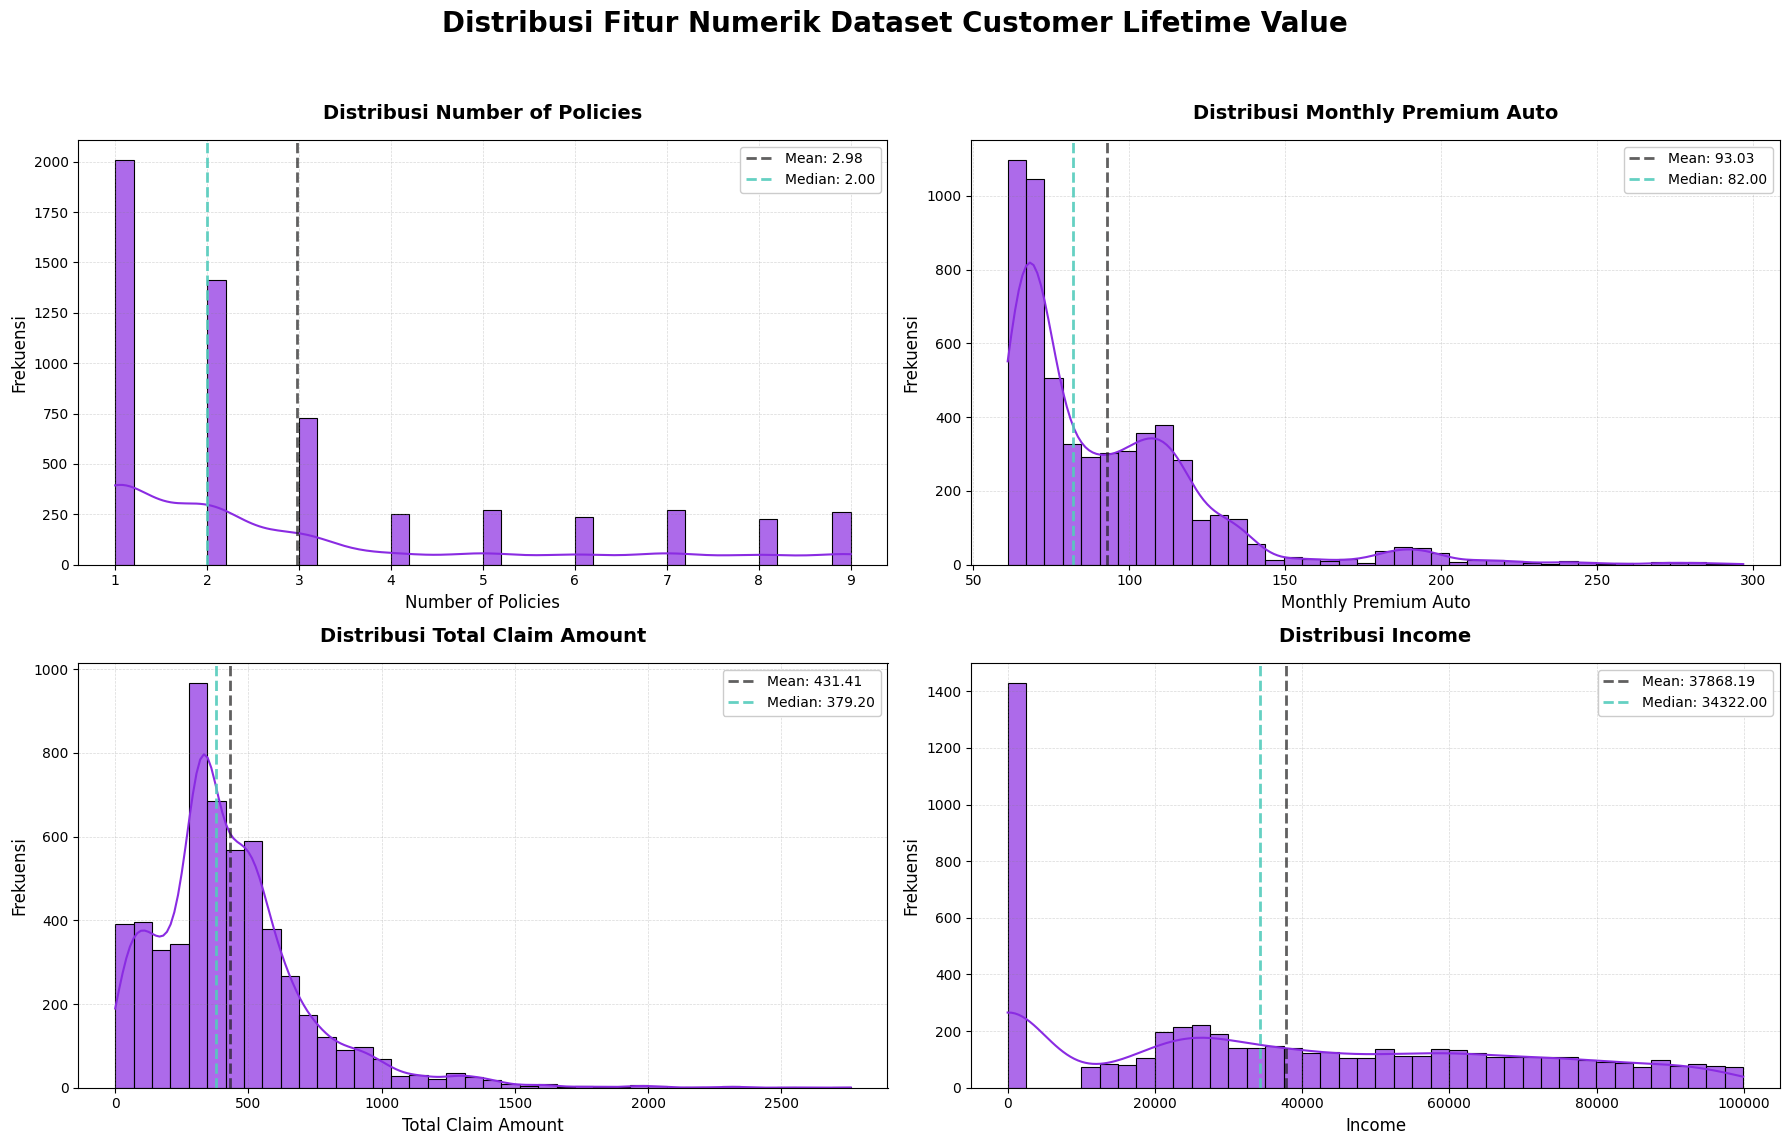

In [9]:
# Memvisualisasikan setiap fitur numerik

# Menghapus fitur CLV dari daftar fitur numerik
if 'Customer Lifetime Value' in numerical_features:
    numerical_features.remove('Customer Lifetime Value')

# Setup Figure
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

# Setup Histogram
for i, feature in enumerate(numerical_features):
    sns.histplot(
        df[feature],
        bins=40,
        kde=True,
        ax=axes[i],
        color='#8A2BE2',
        edgecolor='#000000',
        linewidth=0.8,
        alpha=0.7
    )
    # Setup style dan title
    axes[i].set_title(f'Distribusi {feature}', fontsize=14, color='black', fontweight='bold', pad=15 )
    axes[i].set_xlabel(feature, fontsize=12, color='black', fontweight='500')
    axes[i].set_ylabel('Frekuensi', fontsize=12, color='black', fontweight='500')

    # Grid style
    axes[i].grid(True, alpha=0.3, linestyle='--', color='#808080', linewidth=0.5)

    # Mean Line
    axes[i].axvline(df[feature].mean(), color='#1D1C1C', linestyle='--', 
                    linewidth=2, alpha=0.7, label=f'Mean: {df[feature].mean():.2f}')
    # Median Line
    axes[i].axvline(df[feature].median(), color='#54CCBC', linestyle='--', 
                    linewidth=2, alpha=0.9, label=f'Median: {df[feature].median():.2f}')
    
    # Legend
    axes[i].legend(fontsize=10, loc='upper right', framealpha=1, fancybox=True)

    # Formating agar lebih rapih
    axes[i].tick_params(axis='both', which='major', labelsize=10)



plt.suptitle('Distribusi Fitur Numerik Dataset Customer Lifetime Value', fontsize=20, fontweight='bold', color='black')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Insight**

Dari visualisasi distribusi di atas dapat disimpulkan bahwa:

- Mayoritas nasabah hanya memiliki 1 - 2 **Polis** (median = 2), dengan **Premi** bulanan rata rata Rp93 dan median Rp82. Namun, ada segelintir nasabah dengan premi jauh lebih tinggi bisa dilihat divisualisasi dan dapat diartikan itu adalah outlier.
- Pada fitur Total **Claim Amount**, median klaim hanya Rp379, tapi ada nasabah dengan klaim di atas Rp2.500, bisa terlihat dari ekor kanan distribusi.
- Untuk Income, median nasabah hanya Rp34.322, tapi ada yang berpenghasilan hingga Rp100.000 ini menandakan sangat right-skewed. 


**Hubungan Monthly Premium Auto dengan Total Claim Amount**

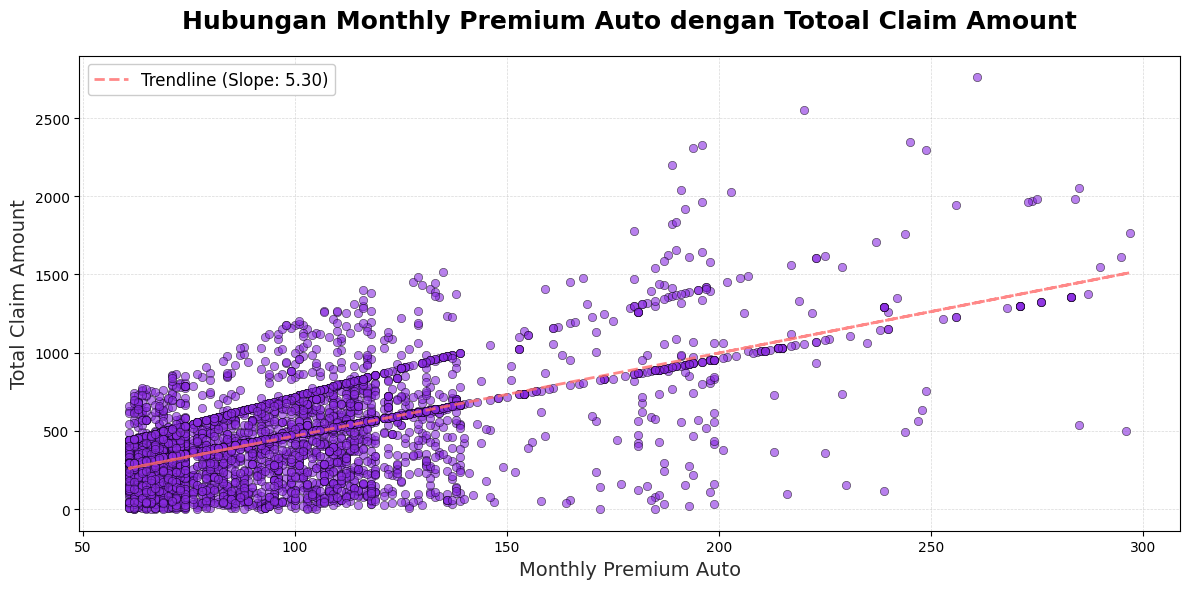

Korelasi Monthly Premium Auto vs Total Claim Amount: 0.636


In [10]:
# Melihat hubungan antara Monthly Premium Auto dengan Claim Amount
plt.figure(figsize=(12, 6))

# Scatter Plot
plt.scatter(df['Monthly Premium Auto'], 
            df['Total Claim Amount'], 
            color='#8A2BE2', 
            alpha=0.6, 
            edgecolor='black',
            linewidths=0.5)

plt.title('Hubungan Monthly Premium Auto dengan Totoal Claim Amount', 
          fontsize=18, fontweight='bold', color='black', pad=20)
plt.xlabel('Monthly Premium Auto', fontsize=14, fontweight=500, color='#2C2C2C')
plt.ylabel('Total Claim Amount', fontsize=14, fontweight=500, color='#2C2C2C')

# Grid
plt.grid(True, alpha=0.3, linestyle='--', color='#808080', linewidth=0.5)

# Menampilkan garis tren linear
z = np.polyfit(df['Monthly Premium Auto'], df['Total Claim Amount'], 1)
p = np.poly1d(z)
plt.plot(df['Monthly Premium Auto'], p(df['Monthly Premium Auto']), 
         color='#FF6B6B', linestyle='--', linewidth=2, alpha=0.8, 
         label=f'Trendline (Slope: {z[0]:.2f})')

plt.legend(fontsize=12, loc='upper left', framealpha=1, fancybox=True)
plt.tight_layout()
plt.show()

correlation = df['Monthly Premium Auto'].corr(df['Total Claim Amount'])
print(f'Korelasi Monthly Premium Auto vs Total Claim Amount: {correlation:.3f}')

**Insight**

Pada visualisasi diatas, dapat kita lihat jelas bahwa semakin tinggi premi bulanan (`Monthly Premium Auto`) yang dibayarkan oleh pelanggan, semakin tinggi pula total klaim (`Total Claim Amount`) yang diajukan, begitupun sebaliknya. Garis tren yang naik ke atas membuktikan adanya hubungan positif. Artinya, pelanggan yang rela membayar premi lebih besar, ternyata juga cenderung mengajukan klaim lebih tinggi.

Menariknya, slope dari garis tren ini adalah 5.3, yang berarti setiap kenaikan premi bulanan sebesar 1 unit, rata rata total klaim pelanggan meningkat sekitar 5.3 unit. Dengan kata lain, pelanggan yang membayar premi lebih besar tidak hanya berkontribusi pada pendapatan perusahaan, tetapi juga cenderung menimbulkan klaim yang lebih tinggi, sehingga perusahaan perlu menyeimbangkan potensi keuntungan dengan risiko klaim.

### **Analisis Fitur Kategorikal**

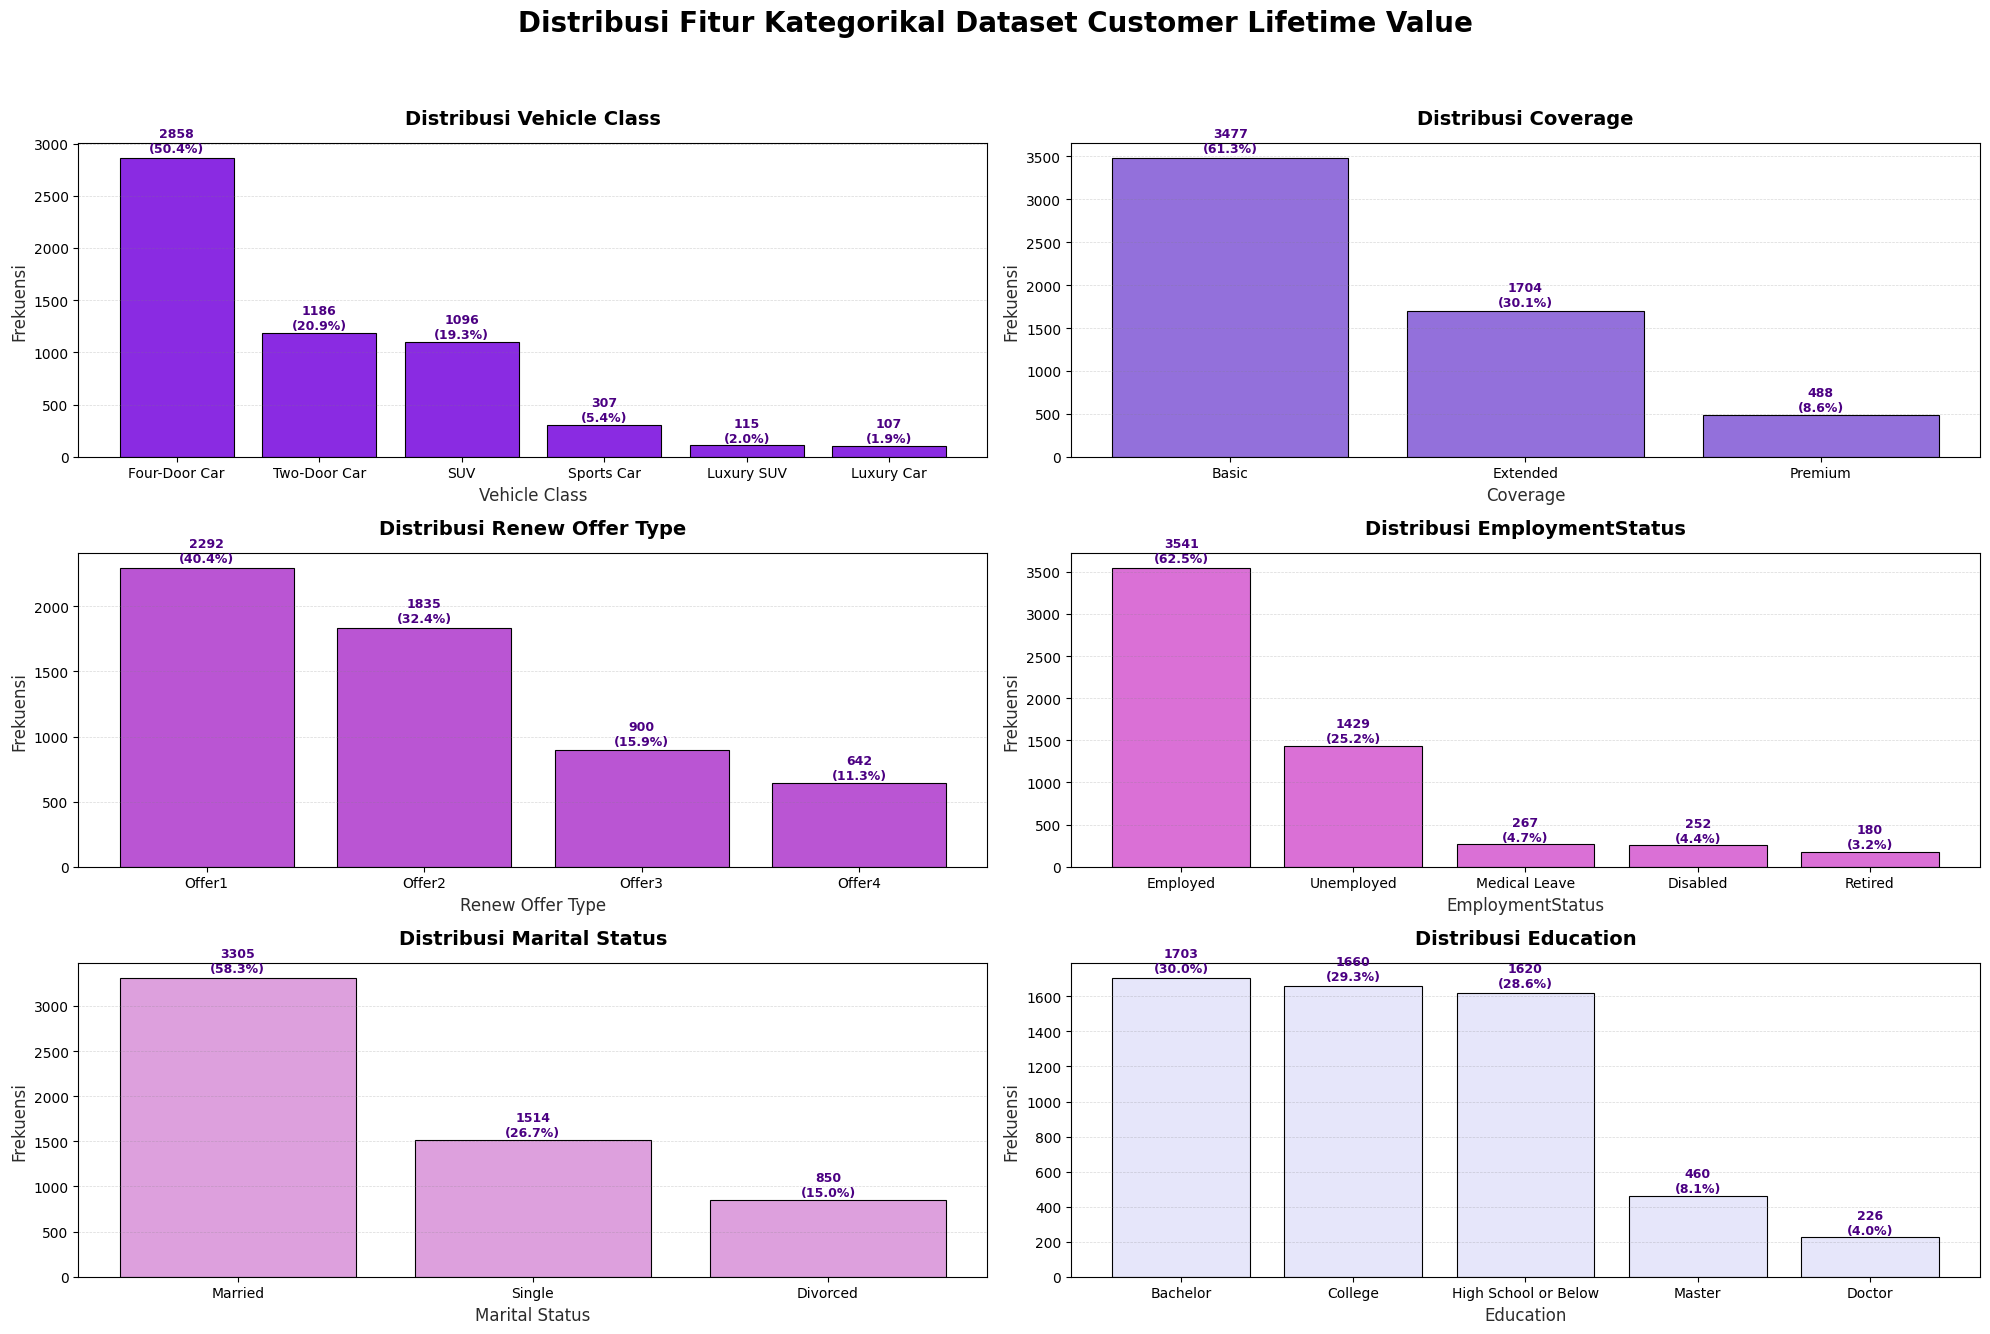

In [11]:
# Variable untuk menyimpan fitur kategorikal
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Setup Figure
fig, axes = plt.subplots(3, 2, figsize=(20, 14))
axes = axes.flatten()

# Color Platten pilihan
purple_colors = ['#8A2BE2', '#9370DB', '#BA55D3', '#DA70D6', '#DDA0DD', '#E6E6FA']

for i, feature in enumerate(categorical_features):
    # Menghitung distribusi
    feature_dist = df[feature].value_counts()
    total_count = len(df[feature])

    # Barchart
    bars = axes[i].bar(feature_dist.index, feature_dist.values, 
                       color=purple_colors[i % len(purple_colors)],  
                       edgecolor='#000000', 
                       linewidth=0.8)
    
    axes[i].set_title(f'Distribusi {feature}', fontsize=14, fontweight='bold', color='black', pad=14)
    axes[i].set_xlabel(feature, fontsize=12, fontweight=500, color='#2C2C2C')
    axes[i].set_ylabel('Frekuensi', fontsize=12, fontweight=500, color='#2C2C2C')

    # Grid
    axes[i].grid(axis='y', alpha=0.3, linestyle='--', color='#808080', linewidth=0.5)

    # Menambahkan persentase di atas bar
    for bar in bars:
        height = bar.get_height()
        percentage = (height / total_count) * 100
        axes[i].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{height:.0f}\n({percentage:.1f}%)', 
                    ha='center', va='bottom', 
                    fontweight='bold', fontsize=9, 
                    color='#4B0082')
        
# Titel
plt.suptitle('Distribusi Fitur Kategorikal Dataset Customer Lifetime Value', fontsize=20, fontweight='bold', color='black', y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Insight**

Berdasarkan visualisasi diatas ditemukan bahwa:

- Kalau kita lihat distribusi kategorikal, mayoritas pelanggan berada di segmen mobil keluarga **(Four-Door Car)** dengan persentase yang mendominasi 50,4% dan lebih dari separuhnya memilih **Basic Coverage** dengan persentasi 61,3%. Penawaran perpanjangan didominasi oleh **Offer1** dan **Offer2**, sementara pelanggan dengan status **Employed** dan **Married** mendominasi, yang menunjukkan basis pelanggan cukup stabil. Dari sisi pendidikan, mayoritas ada di level **High School**, **College**, dan **Bachelor**, sehingga daya beli pelanggan cenderung bervariasi, tapi tidak terlalu ekstrem ke arah kelompok elit.

- Dari temuan ini, ada beberapa rekomendasi bisnis yang bisa diambil. 

    1. Pertama, karena mayoritas pelanggan price-sensitive dan memilih paket dasar, perusahaan bisa mengembangkan strategi upselling ke  Premium Coverage dengan menawarkan nilai tambah yang relevan. 
    2. Kedua, dominasi pelanggan menikah dan pekerja aktif bisa dimanfaatkan dengan membuat paket keluarga atau program retensi jangka panjang. 
    3. Ketiga, segmen kecil seperti pemilik Luxury Car atau pelanggan dengan pendidikan lebih tinggi bisa ditargetkan dengan produk eksklusif yang premium, sehingga perusahaan tidak hanya fokus pada pasar massal, tetapi juga mengoptimalkan segmen niche yang bernilai tinggi.


**Analisis Fitur Kategorikal dengan CLV**

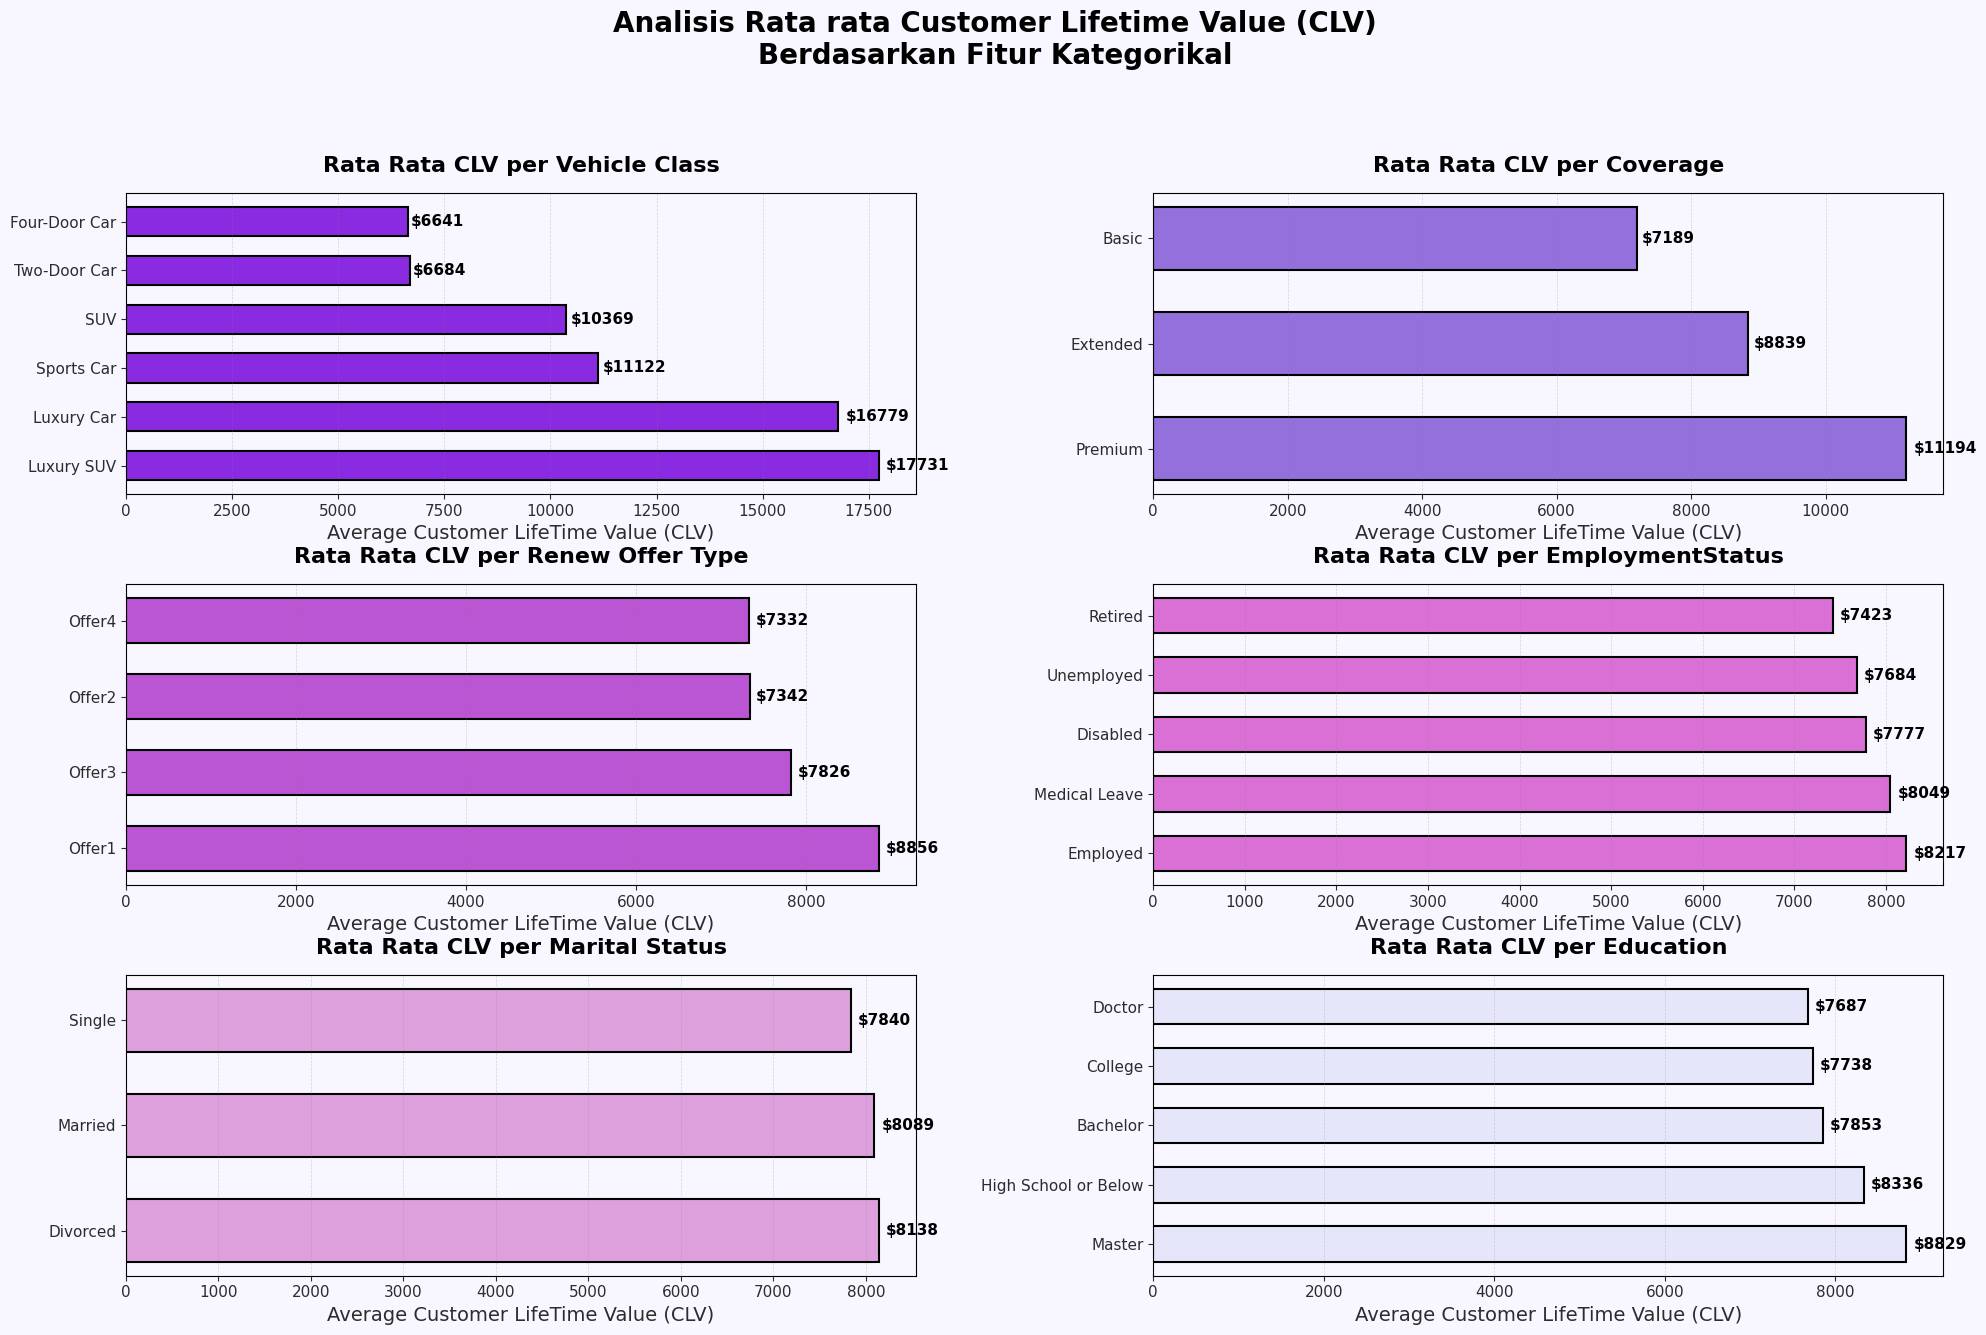

In [12]:
# Setup Figure
fig, axes = plt.subplots(3, 2, figsize=(20, 14))
axes = axes.flatten()
fig.patch.set_facecolor('#F8F6FF')

for i, feature in enumerate(categorical_features):
    # Menghitung rata rata CLV per kategori
    clv_means = df.groupby(feature)['Customer Lifetime Value'].mean().sort_values(ascending=False)

    # Horuzontal Barchart
    bars = axes[i].barh(clv_means.index, clv_means.values,
                        color=purple_colors[i % len(purple_colors)],
                        edgecolor='black',
                        height=0.6,
                        linewidth=1.5)  
    
    # Biasa Styling
    axes[i].set_title(f'Rata Rata CLV per {feature}', fontsize=16, fontweight='bold', color='black', pad=15)
    axes[i].set_xlabel('Average Customer LifeTime Value (CLV)', fontsize=14, fontweight=500, color='#2C2C2C')

    # Grid
    axes[i].grid(axis='x', alpha=0.3, linestyle='--', color='#808080', linewidth=0.5)

    # Background color
    axes[i].set_facecolor('#F8F6FF')

    # Annotations dengan nilai CLV
    for j, bar in enumerate(bars):
        width = bar.get_width()
        axes[i].text(width + width*0.01, bar.get_y() + bar.get_height()/2,
                    f'${width:.0f}', 
                    ha='left', va='center', 
                    fontweight='bold', fontsize=11, 
                    color='black')
        
    # Spines
    for spine in axes[i].spines.values():
        spine.set_color('black')
        
    # Tick styling
    axes[i].tick_params(colors='#2C2C2C', labelsize=11)
    

# Titel dan juga layout
fig.suptitle('Analisis Rata rata Customer Lifetime Value (CLV)\nBerdasarkan Fitur Kategorikal', 
             fontsize=20, fontweight='bold', color="#000000", y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.94])
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()


**Insight**

Dari Visualisasi ditemukan bahwa:

- Dari sisi kendaraan, terlihat pelanggan dengan Luxury SUV ($17,731) dan Luxury Car ($16,779) punya CLV jauh lebih tinggi dibanding kelas kendaraan biasa seperti Four-Door ($6,641) atau Two-Door ($6,684). Artinya, meski jumlahnya kecil, segmen luxury punya nilai seumur hidup yang jauh lebih besar. Dari sisi cakupan, pelanggan dengan Premium Coverage ($11,194) menghasilkan CLV hampir 1.5 kali lebih tinggi dibanding pelanggan Basic Coverage ($7,189), menegaskan pentingnya strategi upselling.

- Kalau dilihat dari faktor demografi, Married ($8,089) dan Divorced ($8,138) punya CLV sedikit lebih tinggi dibanding Single ($7,840), sedangkan dari status pekerjaan, Employed ($8,217) unggul tipis dibanding kategori lain. Dari segi pendidikan, CLV cenderung stabil di kisaran $7,600–$8,300, dengan Master ($8,329) dan High School ($8,336) relatif lebih tinggi. Sementara dari sisi penawaran, Offer1 ($8,856) terbukti memberikan CLV paling tinggi dibanding offer lainnya.

**Analisis Hubungan Faktor Kategorikal dengan Customer Lifetime Value (CLV)**

In [13]:
# Menggunakan teknik ANOVA
print('=' * 50)
print('UJI ANOVA HUBUNGAN FITUR KATEGORIKAL DENGAN CLV')
print('=' * 50)

# Menyimpan hasil ANOVA
anova_results = []

for feature in categorical_features:
    print('\n' + '-' * 50)
    print(f'Menganalisis Fitur: {feature}')
    print('-' * 50)

    # Membuat grup berdasarkan kategori
    groups = []
    categories = df[feature].unique()

    for category in categories:
        clv_values = df[df[feature] == category]['Customer Lifetime Value']
        groups.append(clv_values)

        # Menampilkan rata rata CLV per kategori
        mean_clv = clv_values.mean()
        count = len(clv_values)
        print(f' * {category}: Rata rata CLV = ${mean_clv:.0f} (n={count})')

    # Kita uji ANNOVA
    f_statistic, p_value = f_oneway(*groups)

    # Interpretasi hasil dari uji ANNOVA
    print(f'\nF-statistic: {f_statistic:.3f}')
    print(f'P-Value: {p_value:.6f}')

    # Looping 
    if p_value < 0.05:
        signifikan = 'Signifikan'
        interpretasi = 'Ada perbedaan rata rata CLV yang signifikan antara kategori'
    else:
        signifikan = 'Tidak Signifikan'
        interpretasi = 'Tidak ada perbedaan rata rata CLV yang signifikan antara kategori'

    print(f'Hasil: {signifikan}')
    print(f'Kesimpulan: {interpretasi}')

    # Menyimpan hasil
    anova_results.append({
        'Feature': feature,
        'F-Statistic': f_statistic,
        'P-Value': p_value,
        'Signifikan': signifikan == 'Signifikan',
        'Interpretasi': interpretasi
    })

# Kita tujukkan ringkasan hasil ANOVA
print('\n' + '=' * 50)
print('RINGKASAN HASIL UJI ANNOVA')
print('=' * 50)

results_df = pd.DataFrame(anova_results)
results_df['Interpretasi'] = results_df['Signifikan'].map({
    True: 'Berpengaruh Signifikan',
    False: 'Tidak Berpengaruh'
})


# Tampilkan tabel ringkasan hasil ANOVA dengan pengaturan index dan float_format
with pd.option_context('display.float_format', '{:.6f}'.format):
    display(results_df)

# Menghitung beberapa fitur yang signifikan
significant_count = sum(results_df['Signifikan'])
total_features = len(results_df)



UJI ANOVA HUBUNGAN FITUR KATEGORIKAL DENGAN CLV

--------------------------------------------------
Menganalisis Fitur: Vehicle Class
--------------------------------------------------
 * Four-Door Car: Rata rata CLV = $6641 (n=2858)
 * Two-Door Car: Rata rata CLV = $6684 (n=1186)
 * SUV: Rata rata CLV = $10369 (n=1096)
 * Sports Car: Rata rata CLV = $11122 (n=307)
 * Luxury SUV: Rata rata CLV = $17731 (n=115)
 * Luxury Car: Rata rata CLV = $16779 (n=107)

F-statistic: 171.192
P-Value: 0.000000
Hasil: Signifikan
Kesimpulan: Ada perbedaan rata rata CLV yang signifikan antara kategori

--------------------------------------------------
Menganalisis Fitur: Coverage
--------------------------------------------------
 * Extended: Rata rata CLV = $8839 (n=1704)
 * Basic: Rata rata CLV = $7189 (n=3477)
 * Premium: Rata rata CLV = $11194 (n=488)

F-statistic: 91.207
P-Value: 0.000000
Hasil: Signifikan
Kesimpulan: Ada perbedaan rata rata CLV yang signifikan antara kategori

--------------------

,Feature,F-Statistic,P-Value,Signifikan,Interpretasi
0,Vehicle Class,171.192494,0.000000,True,Berpengaruh Signifikan
1,Coverage,91.207296,0.000000,True,Berpengaruh Signifikan
2,Renew Offer Type,19.576342,0.000000,True,Berpengaruh Signifikan
3,EmploymentStatus,1.969727,0.096273,False,Tidak Berpengaruh
4,Marital Status,0.796127,0.451123,False,Tidak Berpengaruh
5,Education,3.491321,0.007455,True,Berpengaruh Signifikan


**Insight**

Hasil uji ANOVA menunjukkan bahwa Vehicle Class, Coverage, Renew Offer Type, dan Education terbukti berpengaruh signifikan terhadap variasi Customer Lifetime Value (CLV), sedangkan Employment Status dan Marital Status tidak memberikan pengaruh yang berarti. Artinya, faktor yang lebih terkait dengan produk dan penawaran perusahaan memiliki dampak lebih besar terhadap CLV dibanding faktor demografi personal pelanggan.

> Notes!
Hasil ANOVA nunjukin kalau Education memang signifikan dengan CLV (p-value 0.007 < 0.05), tapi pengaruhnya nggak sekuat Vehicle Class atau Coverage. Jadi bisa dibilang faktor pendidikan tetap berperan, cuma kontribusinya lebih kecil dibanding fitur lain.

**Deteksi Missing Value**

In [31]:
print('=' * 60)
print('ANALISIS MISSING VALUE')
print('=' * 60)

# Check missing value per kolom
missing_summary = pd.DataFrame({
    'Feature': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes
})

missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values(
    'Missing_Percentage', ascending=False
)

if len(missing_summary) == 0:
    print('TIDAK ADA MISSING VALUE!')
    print(f'   Total baris: {len(df)}')
    print(f'   Total kolom: {len(df.columns)}')
else:
    print('DITEMUKAN MISSING VALUE:')
    display(missing_summary)
    
    # Visualisasi jika ada missing
    plt.figure(figsize=(12, 6))
    plt.bar(missing_summary['Feature'], missing_summary['Missing_Percentage'])
    plt.title('Missing Value Distribution', fontsize=14, fontweight='bold')
    plt.ylabel('Missing Percentage (%)')
    plt.xticks(rotation=45)
    plt.show()

ANALISIS MISSING VALUE
TIDAK ADA MISSING VALUE!
   Total baris: 5669
   Total kolom: 11


Pada dataset `Costumer Lifetime Value`, tidak di temukan adanya **Mising Value** karena pada informasi singkat diatas yang telah aku lakukan juga tidak ada jumlah baris yang berbeda, tapi ternyata ditemukan adanya **Duplikasi** pada dataset sebanyak 618 baris.

**Deteksi Outliers**

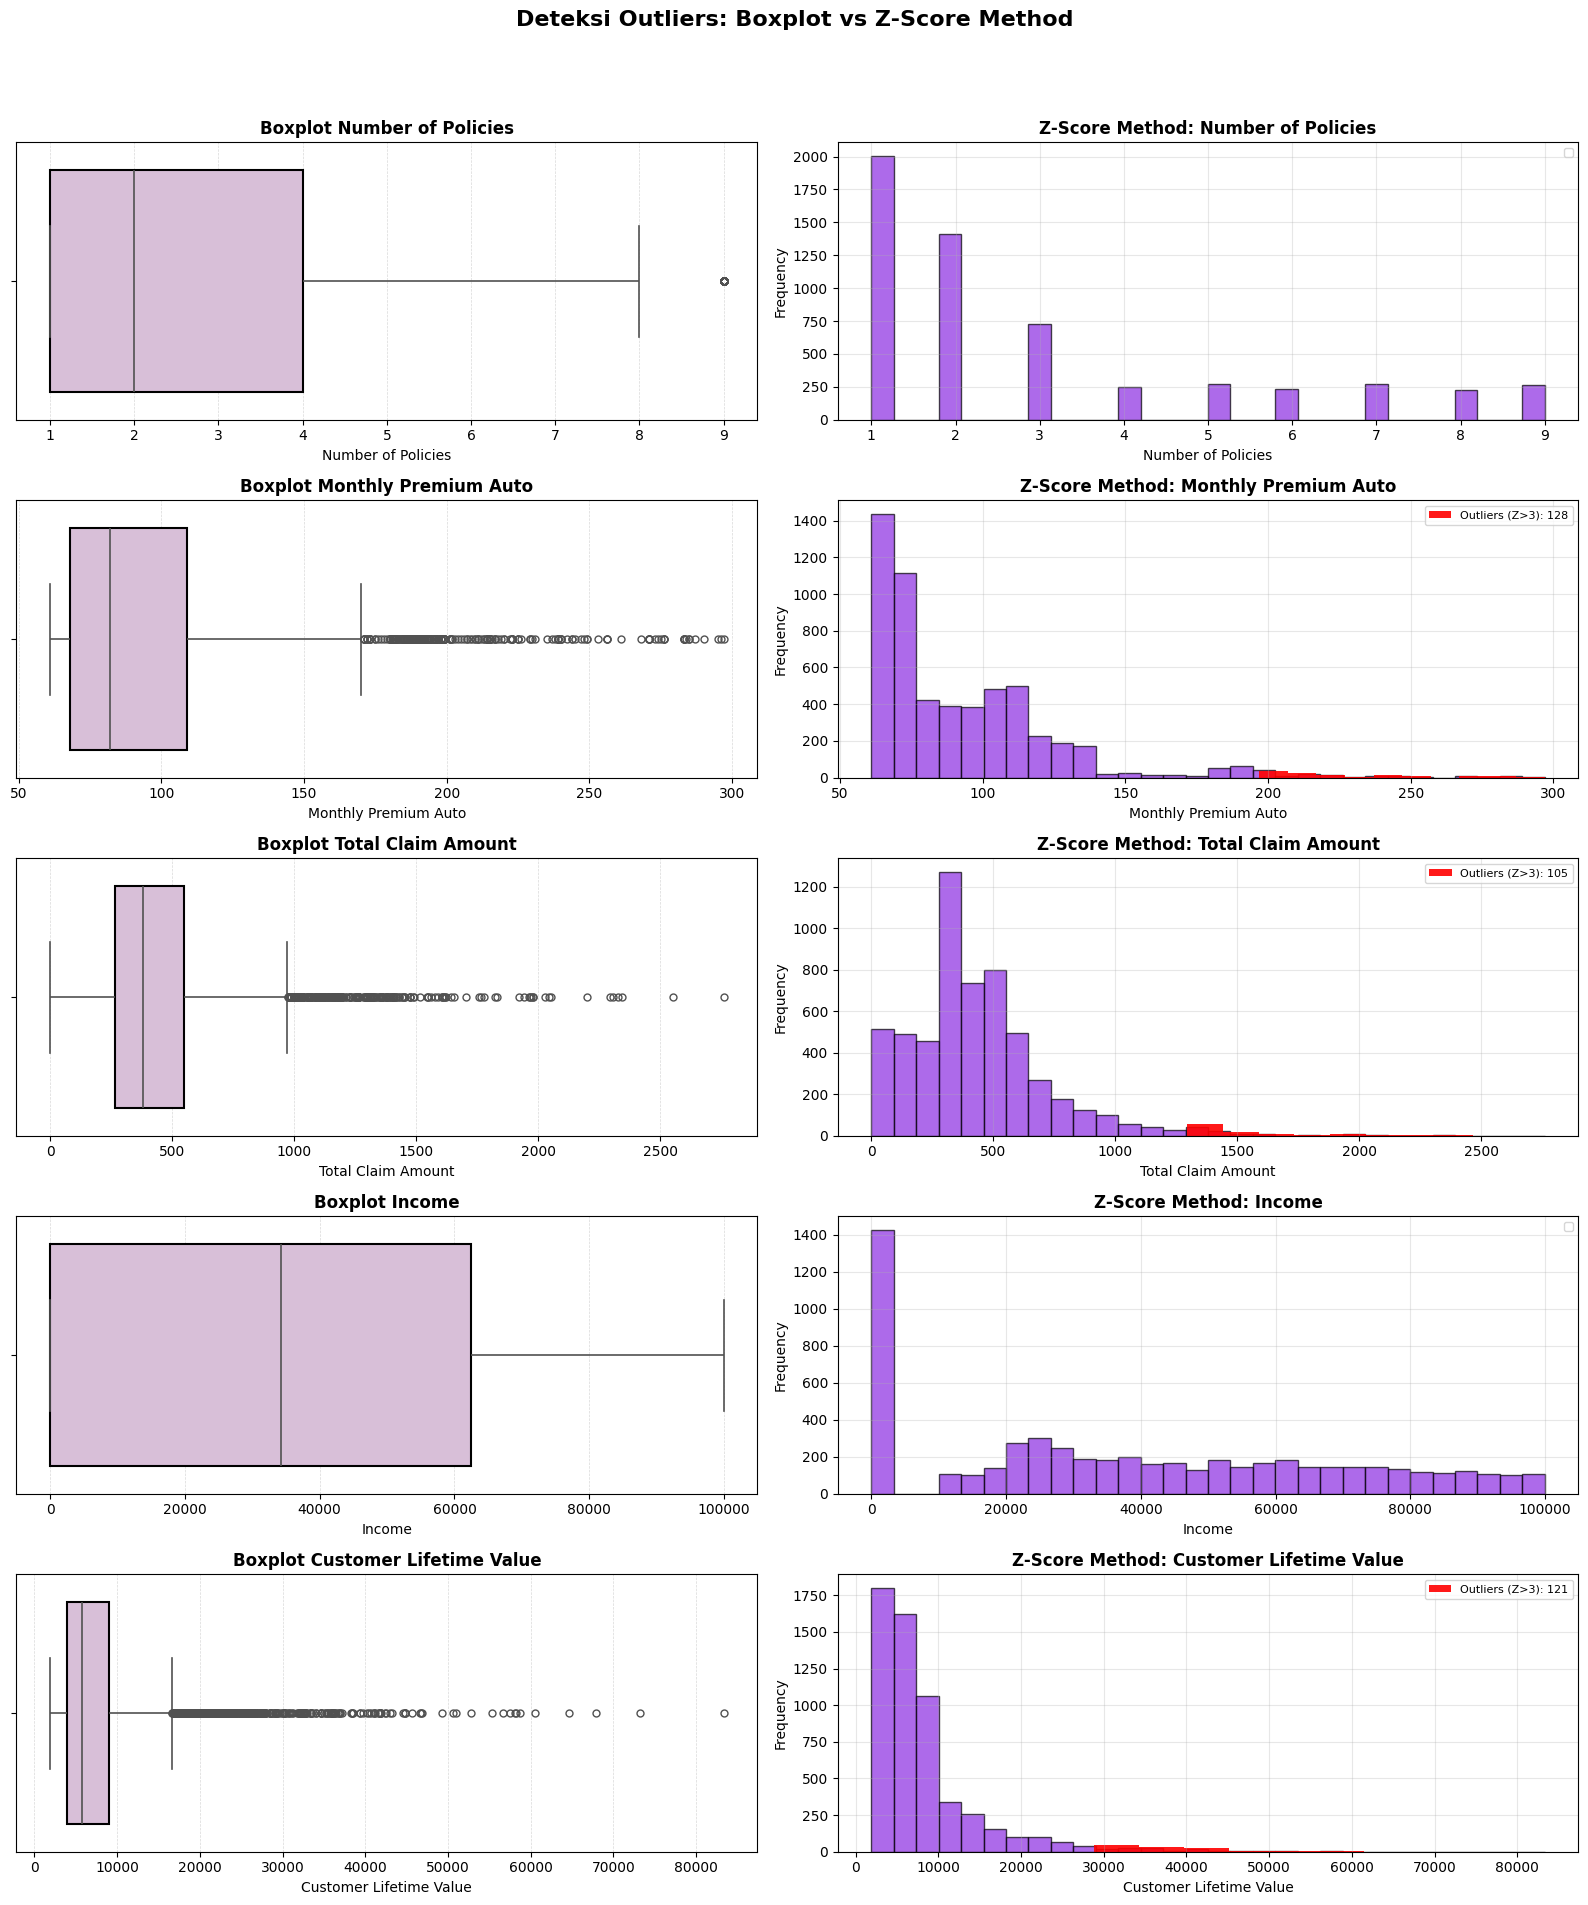

SUMMARY DETEKSI OUTLIERS DENGAN Z-SCORE METHOD (Z > 3)


,Feature,Z-Score Outliers,Outlier Percentage
1,Monthly Premium Auto,128,2.257894
4,Customer Lifetime Value,121,2.134415
2,Total Claim Amount,105,1.852179
0,Number of Policies,0,0.000000
3,Income,0,0.000000


In [15]:
# Menambahkan Customer Lifetime Value (CLV) ke varible numerik
if 'Customer Lifetime Value' not in numerical_features:
    numerical_features.append('Customer Lifetime Value')

# Setup Figure 
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(16, 20))

# Ini untuk Z-Score method dan summry kita nanti
z_threshold = 3
outlier_summary = []

for i, feature in enumerate(numerical_features):
    # Boxplot (kolom 0)
    sns.boxplot(
        ax=axes[i, 0],
        x=df[feature],
        color='#8A2BE2',
        fliersize=5,
        linewidth=1.2,
        boxprops=dict(edgecolor='black', facecolor='#D8BFD8', linewidth=1.5)
    )
    axes[i, 0].set_title(f'Boxplot {feature}', fontsize=12, fontweight='bold')
    axes[i, 0].set_xlabel(feature, fontsize=10)
    axes[i, 0].grid(axis='x', alpha=0.3, linestyle='--', color='#808080', linewidth=0.5)

    # Histogram dengan Z-score threshold (kolom 1)
    z_scores = np.abs(stats.zscore(df[feature]))
    outliers = z_scores > z_threshold
    outlier_count = len(df[feature][outliers])

    axes[i, 1].hist(df[feature], bins=30, alpha=0.7, color='#8A2BE2', edgecolor='black')
    outlier_values = df[feature][outliers]
    if len(outlier_values) > 0:
        axes[i, 1].hist(outlier_values, bins=10, alpha=0.9, color='red', 
                        label=f'Outliers (Z>{z_threshold}): {len(outlier_values)}')

    axes[i, 1].set_title(f'Z-Score Method: {feature}', fontsize=12, fontweight='bold')
    axes[i, 1].set_xlabel(feature, fontsize=10)
    axes[i, 1].set_ylabel('Frequency', fontsize=10)
    axes[i, 1].legend(fontsize=8)
    axes[i, 1].grid(alpha=0.3)
    
    # Menyimpan summary outliers
    outlier_summary.append({
        'Feature': feature,
        'Z-Score Outliers': outlier_count,
        'Outlier Percentage': (outlier_count / len(df)) * 100
    })

plt.suptitle('Deteksi Outliers: Boxplot vs Z-Score Method', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Menampilkan summary outliers
print('='*60)
print('SUMMARY DETEKSI OUTLIERS DENGAN Z-SCORE METHOD (Z > 3)')
print('='*60)
outlier_df = pd.DataFrame(outlier_summary).sort_values(by='Z-Score Outliers', ascending=False)
display(outlier_df)

**Insight**

Dari hasil deteksi outlier dengan metode Z-Score, terlihat bahwa sebagian besar fitur relatif bersih, hanya ada 2–2.3% data yang terdeteksi sebagai outlier pada Monthly Premium Auto, Customer Lifetime Value, dan Total Claim Amount. Fitur Number of Policies dan Income justru tidak menunjukkan outlier sama sekali. Menariknya, outlier terbanyak ada di Monthly Premium Auto (128 data, 2.26%), yang kemungkinan berasal dari pelanggan dengan premi bulanan jauh di atas rata rata. Kondisi serupa juga terlihat pada Customer Lifetime Value (121 data, 2.13%), yang menunjukkan ada pelanggan dengan nilai seumur hidup sangat tinggi.

> Jadi outliers disini aku anggap bisa jadi bukan error, melainkan pelanggan atau nasabah yang memiliki kontribusi yang besar, dibuktikan juga dengan adanya hubungan yang sangat kuat antara Monthly Premium Auto, Customer Lifetime Value, dan Total Claim Amount, Semakin tinggi nilai claim, semakin besar pula nilai premi bulanan dan nilai seumur hidup.


**Analisis Multikolinearitas**

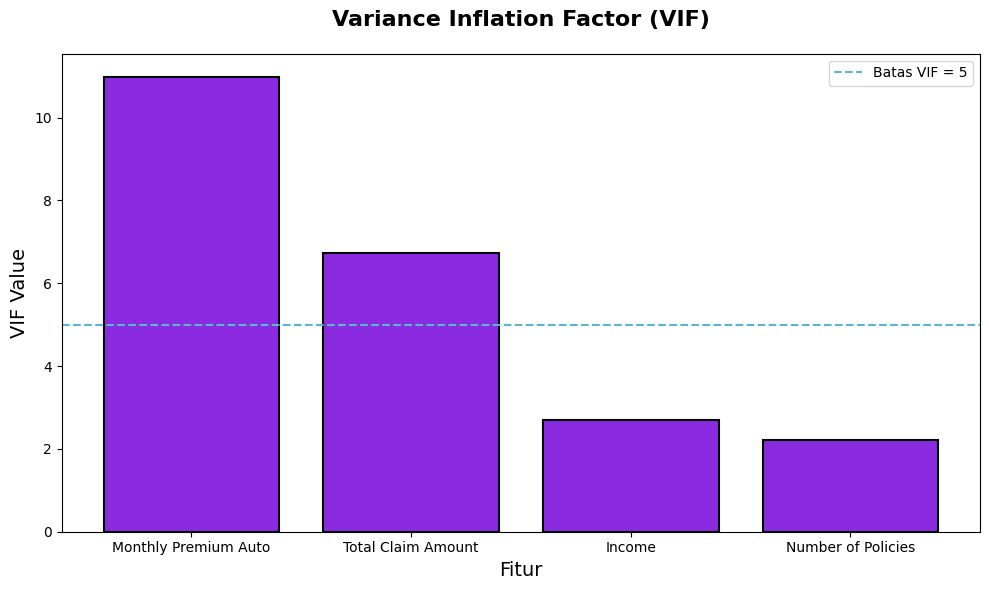

,Fitur,VIF
1,Monthly Premium Auto,10.991837
2,Total Claim Amount,6.741815
3,Income,2.699565
0,Number of Policies,2.211783


In [16]:
# Fitur numerik tanpa target
if 'Customer Lifetime Value' in numerical_features:
    numerical_features.remove('Customer Lifetime Value')

# Menyiapkan data untuk VIF
data_vif = df[numerical_features]

# Menghitung VIF untuk setiap fitur
vif_results = []
for i in range(len(numerical_features)):
    vif = variance_inflation_factor(data_vif.values, i)
    vif_results.append({
        'Fitur': numerical_features[i],
        'VIF': vif
    })

# Membuat dataframe hasil VIF
vif_df = pd.DataFrame(vif_results)
vif_df = vif_df.sort_values('VIF', ascending=False)

# Visualisasi Bar
plt.figure(figsize=(10, 6))
plt.bar(vif_df['Fitur'], 
        vif_df['VIF'], 
        color='#8A2BE2', 
        edgecolor='black',
        linewidth=1.5)

# Style 
plt.title('Variance Inflation Factor (VIF)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Fitur', fontsize=14, fontweight=500)
plt.ylabel('VIF Value', fontsize=14, fontweight=500)

# Garisnya
plt.axhline(y=5, color="#5AB6CB", linestyle='--', label='Batas VIF = 5')

plt.legend()
plt.tight_layout()
plt.show()

# MEnampilkan hasil VIF
display(vif_df)

**Insight**

Dari grafik VIF tadi, kelihatan jelas kalau `Monthly Premium Auto` dan `Total Claim Amount` punya angka VIF yang tinggi (10.99 dan 6.74). Secara teori statistik, ini udah nunjukin adanya **MULTIKOLINEARITAS**. Setau aku ini bisa bikin model linear agak bingung dan koefisiennya jadi nggak stabil.

Tapi kalau ditarik ke logika bisnis, dua fitur ini justru saling ngisi. Premi bulanan ngegambarin komitmen finansial nasabah, sedangkan total klaim nunjukin seberapa aktif mereka pakai asuransi. Jadi sebenarnya dua duanya punya cerita berbeda yang sama sama penting.

> Keputusan:
Daripada buang salah satunya, lebih baik kita bikin fitur turunan (misalnya rasio atau interaksi keduanya). Dengan begitu, model bisa tetap belajar pola bisnis yang nyata tanpa harus kehilangan info penting dari fitur asli. Sekalian mengimplementasikan perkuliahan manajemen.

## **Data Preprocessing**

**Menangani Duplikasi Data**

In [17]:
# Mengecek duplikasi data
print('=' * 50)
print('ANALISIS DUPLIKASI DATA'.center(80))
print('=' * 50)

print(f'Total baris dalam dataset: {len(df)}')
print(f'Total baris unik (tanpa duplikasi): {df.drop_duplicates().shape[0]}')
print(f'Jumlah baris duplikat penuh: {df.duplicated().sum()}')
print(f'Persentase duplikasi: {(df.duplicated().sum() / len(df)) * 100:.2f}%')

print('=' * 50)

# Menampilkan contoh baris yang benar-benar duplikat (semua kolom identik)
if df.duplicated().sum() > 0:
    print('CONTOH BARIS YANG DUPLIKAT PENUH:')
    duplicate_full = df[df.duplicated(keep=False)].sort_values(by=list(df.columns))
    display(duplicate_full.head(10))  # Tampilkan 10 baris pertama saja
else:
    print('Tidak ada duplikasi data penuh dalam dataset!')

                            ANALISIS DUPLIKASI DATA                             
Total baris dalam dataset: 5669
Total baris unik (tanpa duplikasi): 5051
Jumlah baris duplikat penuh: 618
Persentase duplikasi: 10.90%
CONTOH BARIS YANG DUPLIKAT PENUH:


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
540,Four-Door Car,Basic,Offer1,Disabled,Divorced,Bachelor,1.0,63.0,352.394515,19864.0,2359.423599
1784,Four-Door Car,Basic,Offer1,Disabled,Divorced,Bachelor,1.0,63.0,352.394515,19864.0,2359.423599
3317,Four-Door Car,Basic,Offer1,Disabled,Divorced,Bachelor,1.0,63.0,352.394515,19864.0,2359.423599
3830,Four-Door Car,Basic,Offer1,Disabled,Divorced,Bachelor,1.0,63.0,352.394515,19864.0,2359.423599
297,Four-Door Car,Basic,Offer1,Disabled,Divorced,Master,2.0,74.0,523.888845,26057.0,8509.850887
2401,Four-Door Car,Basic,Offer1,Disabled,Divorced,Master,2.0,74.0,523.888845,26057.0,8509.850887
3005,Four-Door Car,Basic,Offer1,Disabled,Divorced,Master,2.0,74.0,523.888845,26057.0,8509.850887
4211,Four-Door Car,Basic,Offer1,Disabled,Divorced,Master,2.0,74.0,523.888845,26057.0,8509.850887
5140,Four-Door Car,Basic,Offer1,Disabled,Divorced,Master,2.0,74.0,523.888845,26057.0,8509.850887
1445,Four-Door Car,Basic,Offer1,Disabled,Divorced,Master,3.0,65.0,312.000000,22886.0,5096.673223


Ternyata ada duplikasi yang permanen dalam dataset ini, maka dari itu saya akan menghapusnya saja, karena jika di biarkan model regresi akan mempelajari pola yang sama dari data duplikat, yang dapat menyebabkan model bias.

In [18]:
# Menghapus Duplikasi Data
df_cleaned = df.drop_duplicates().reset_index(drop=True)
print(f'\nSetelah menghapus duplikasi, jumlah baris menjadi: {len(df_cleaned)}')


Setelah menghapus duplikasi, jumlah baris menjadi: 5051


**Feature Engineering**

In [ ]:
print('=' * 70)
print('FEATURE ENGINEERING - MEMBUAT FITUR BARU'.center(70))
print('=' * 70)

# Membuat copy df_cleaned untuk feature engineering
df_engineered = df_cleaned.copy()

# 1. Premi Per Polis - Rata rata premi untuk setiap polis yang dimiliki
# Contohnya Nasabah bayar 200/bulan punya 2 polis = 100 per polis
df_engineered['Premi_Per_Polis'] = df_engineered['Monthly Premium Auto'] / (df_engineered['Number of Policies'] + 0.0001)
print('* Premi Per Polis dibuat')

# 2. Rasio Klaim vs Premi - Berapa banyak nasabah klaim dibanding bayar premi
# Contohnya Klaim 500 vs Premi 100 = Rasio 5.0 (nasabah untung besar)
df_engineered['Rasio_Klaim_Premi'] = df_engineered['Total Claim Amount'] / (df_engineered['Monthly Premium Auto'] + 0.0001)
print('* Rasio Klaim vs Premi dibuat')

# 3. Beban Premi Terhadap Gaji - Seberapa berat premi dibanding penghasilan
# Contohnya Premi 100 vs Gaji 10000 = 0.01 atau 1% dari gaji
df_engineered['Beban_Premi_Gaji'] = df_engineered['Monthly Premium Auto'] / (df_engineered['Income'] + 0.0001)
print('* Beban Premi Terhadap Gaji dibuat')

# 4. Total Investasi Bulanan - Total uang yang dikeluarkan per bulan untuk semua polis
# Contohnya Premi 100 x 3 polis = 300 total per bulan
df_engineered['Total_Investasi_Bulanan'] = df_engineered['Monthly Premium Auto'] * df_engineered['Number of Policies']
print('* Total Investasi Bulanan dibuat')

# 5. Nasabah Berpenghasilan Tinggi - Flag untuk identifikasi nasabah kaya (top 25%)
income_75th = df_engineered['Income'].quantile(0.75)
df_engineered['Nasabah_Berpenghasilan_Tinggi'] = (df_engineered['Income'] > income_75th).astype(int)
print(f'* Nasabah Berpenghasilan Tinggi dibuat (threshold: ${income_75th:,.0f})')

df_engineered['Pemilik_Kendaraan_Mewah'] = df_engineered['Vehicle Class'].isin(['Luxury Car', 'Luxury SUV']).astype(int)
# 6. Pemilik Kendaraan Mewah - Flag untuk nasabah dengan mobil premium
print('* Pemilik Kendaraan Mewah dibuat')

# 7. Paket Asuransi Premium - Flag untuk nasabah dengan coverage tertinggi
df_engineered['Paket_Premium'] = (df_engineered['Coverage'] == 'Premium').astype(int)
print('* Paket Asuransi Premium dibuat')

# 8. Nasabah VIP - Kombinasi: Gaji tinggi + Mobil mewah = Target utama perusahaan
df_engineered['Nasabah_VIP'] = (
    (df_engineered['Nasabah_Berpenghasilan_Tinggi'] == 1) & 
    (df_engineered['Pemilik_Kendaraan_Mewah'] == 1)
).astype(int)
print('* Nasabah VIP dibuat')

print('\n' + '=' * 70)
print(f'TOTAL FITUR BARU YANG DIBUAT: 8 fitur')
print('=' * 70)

# Daftar fitur baru untuk preview
new_features = [
    'Premi_Per_Polis', 'Rasio_Klaim_Premi', 'Beban_Premi_Gaji',
    'Total_Investasi_Bulanan', 'Nasabah_Berpenghasilan_Tinggi', 
    'Pemilik_Kendaraan_Mewah', 'Paket_Premium', 'Nasabah_VIP'
]

print('\nSAMPLE DATA DENGAN FITUR BARU:')
display(df_engineered[['Customer Lifetime Value'] + new_features].head(10))

# Statistik deskriptif untuk fitur numerik continuous saja
numeric_new_features = [
    'Premi_Per_Polis', 'Rasio_Klaim_Premi', 
    'Beban_Premi_Gaji', 'Total_Investasi_Bulanan'
]

print('\nSTATISTIK DESKRIPTIF FITUR BARU (NUMERIK):')
display(df_engineered[numeric_new_features].describe())

# Update df_cleaned dengan fitur baru
df_cleaned = df_engineered.copy()
print(f'\nDataset berhasil diupdate! Shape sekarang: {df_cleaned.shape}')

               FEATURE ENGINEERING - MEMBUAT FITUR BARU               
* Premi Per Polis dibuat
* Rasio Klaim vs Premi dibuat
* Beban Premi Terhadap Gaji dibuat
* Total Investasi Bulanan dibuat
* Nasabah Berpenghasilan Tinggi dibuat (threshold: $62,472)
* Pemilik Kendaraan Mewah dibuat
* Paket Asuransi Premium dibuat
* Nasabah VIP dibuat

TOTAL FITUR BARU YANG DIBUAT: 8 fitur

SAMPLE DATA DENGAN FITUR BARU:


,Customer Lifetime Value,Premi_Per_Polis,Rasio_Klaim_Premi,Beban_Premi_Gaji,Total_Investasi_Bulanan,Nasabah_Berpenghasilan_Tinggi,Pemilik_Kendaraan_Mewah,Paket_Premium,Nasabah_VIP
0,10083.486880,44.997750,6.349766,0.007609,180.0,0,0,0,0
1,4943.386117,10.333161,1.847004,0.001385,372.0,0,0,0,0
2,11981.984810,30.998450,4.149167,0.002882,124.0,0,0,0,0
3,4550.856045,115.988401,4.799996,0.006476,116.0,0,0,1,0
4,2372.155492,61.993801,5.739036,0.003258,62.0,0,0,0,0
5,8649.700578,13.374833,0.794987,0.001134,856.0,1,0,0,0
6,12052.984090,50.497475,5.787793,0.003973,202.0,0,0,1,0
7,2621.116054,65.993401,2.196784,0.002493,66.0,0,0,0,0
8,5243.828046,12.999740,4.070206,0.001775,325.0,0,0,0,0
9,9156.322563,38.998700,4.981038,0.001962,351.0,0,0,1,0



STATISTIK DESKRIPTIF FITUR BARU (NUMERIK):


,Premi_Per_Polis,Rasio_Klaim_Premi,Beban_Premi_Gaji,Total_Investasi_Bulanan
count,5051.000000,5051.000000,5.051000e+03,5051.000000
mean,52.084162,4.560870,2.471451e+05,279.117798
std,38.937626,2.312417,4.470937e+05,261.075220
min,6.777702,0.003010,6.117005e-04,61.000000
25%,21.999267,3.079956,1.377085e-03,104.500000
50%,39.998000,4.799993,2.592944e-03,188.000000
75%,70.992901,5.667371,6.200000e+05,366.000000
max,296.970303,12.107017,2.900000e+06,2664.000000



Dataset berhasil diupdate! Shape sekarang: (5051, 19)


**Penjelasan Fitur Baru**

Setelah aku pikir pikir, dan juga ngobrol bareng AI andalan, akhirnya aku nemuin ide untuk bikin 8 fitur turunan baru supaya bisa lebih jelas ngegambarin perilaku nasabah.

`Fitur Numerik`
1. Premi Per Polis - Rata rata premi per polis, nunjukin seberapa premium tiap kontrak.
2. Rasio Klaim vs Premi - Bandingin total klaim dengan premi, buat tahu profitabilitas nasabah.
3. Beban Premi Terhadap Gaji - Porsi gaji yang dipakai buat premi, indikator stabilitas & risiko churn.
4. Total Investasi Bulanan - Total semua premi bulanan, tanda seberapa all-in nasabah ke perusahaan.

`Fitur Kategorikal`

5. Nasabah Berpenghasilan Tinggi - Segmen dengan daya beli premium.
6. Pemilik Kendaraan Mewah - Butuh proteksi ekstra, nggak masalah bayar lebih.
7. Paket Asuransi Premium - Preferensi proteksi maksimal, cenderung loyal.
8. Nasabah VIP (gaji tinggi + mobil mewah) - Segmen emas dengan kontribusi CLV paling besar.

**Insight**

Dengan 8 fitur baru ini, kita berhasil menciptakan layer informasi tambahan yang lebih kaya secara konteks bisnis. Kalau sebelumnya model hanya membaca angka mentah seperti premi $100, klaim $500, atau gaji $50,000, sekarang model bisa memahami hubungan antar angka tersebut. Misalnya, 
- Apakah premi $100 itu terasa ringan atau berat bagi nasabah? dilihat dari Beban_Premi_Gaji 
- Apakah nasabah itu menguntungkan? dilihat dari Rasio_Klaim_Premi
- Atau apakah ia termasuk segmen VIP? dilihat dari kombinasi Income dan Vehicle Class.

Fitur rasio dan interaksi ini juga bisa membuat model bisa menangkap pola non linear yang sebelumnya tersembunyi.
Contoh:
* Nasabah dengan gaji $30,000 dan premi $50 (1.7% dari gaji) → Stabil
* Nasabah dengan gaji $30,000 dan premi $150 (5% dari gaji) → Berisiko churn

Intinya aku buat 8 fitur ini selain ingin meningkatkan akurasi prediksi model, aku junga ingin belajar bagaimana bisa melihat perilaku nasabah menggunakan machine learning.


**Mengatasi Outliers**

In [20]:
# Identifikasi Outliers dengan metode Z-Score > 3
z_score_clv = np.abs(stats.zscore(df_cleaned['Customer Lifetime Value']))
outliers_clv = df_cleaned[z_score_clv > 3]
non_outliers_clv = df_cleaned[z_score_clv <= 3]

# MEncari jmlah outliers
print(f'Jumlah Outliers yang terdeteksi pada CLV: {len(outliers_clv)} dari {len(df_cleaned)} Data Pelanggan')
print(f'Outliers hanya {(len(outliers_clv)/len(df_cleaned)*100):.2f}% dari total pelanggan')

# Kita bandingkan
print('\n' + '=' * 50)
print("PERBANDINGAN OUTLIERS VS NON-OUTLIERS")
print('='* 50)

# Kita pakai rata rata saja
comparasion_data = {
    'Metrik' : ['CLV Avrerage', 'Monthly Premium Auto', 'Total Claim Amount', 'Income'],
    'Outliers (High - Value)': [
        f"${outliers_clv['Customer Lifetime Value'].mean():,.0f}",
        f"${outliers_clv['Monthly Premium Auto'].mean():,.0f}",
        f"${outliers_clv['Total Claim Amount'].mean():,.0f}",
        f"${outliers_clv['Income'].mean():,.0f}"
    ],
    'Non-Outliers (Low - Value)': [
        f"${non_outliers_clv['Customer Lifetime Value'].mean():,.0f}",
        f"${non_outliers_clv['Monthly Premium Auto'].mean():,.0f}",
        f"${non_outliers_clv['Total Claim Amount'].mean():,.0f}",
        f"${non_outliers_clv['Income'].mean():,.0f}"
    ]
}

# Kita jadikan dataframe agar outputnya rapi
comparasion_df = pd.DataFrame(comparasion_data)
display(comparasion_df)

Jumlah Outliers yang terdeteksi pada CLV: 112 dari 5051 Data Pelanggan
Outliers hanya 2.22% dari total pelanggan

PERBANDINGAN OUTLIERS VS NON-OUTLIERS


,Metrik,Outliers (High - Value),Non-Outliers (Low - Value)
0,CLV Avrerage,"$38,856","$7,361"
1,Monthly Premium Auto,$141,$92
2,Total Claim Amount,$643,$425
3,Income,"$40,646","$37,674"


**Insight **

Dari hasil analisis, sekitar 2.22% pelanggan masuk kategori outliers di CLV, yaitu 112 dari total 5051 pelanggan. Yang menariknya, rata rata CLV mereka jauh di atas pelanggan lain ($38,856 vs $7,361). Nggak cuma itu, mereka juga tercatat punya premi bulanan lebih tinggi ($141 vs $92) dan klaim lebih besar ($643 vs $425). Jadi bisa dibilang, outliers ini bukan sekadar anomali, tapi kelompok pelanggan dengan karakteristik berbeda.

> Noted

Secara bisnis, mereka bisa kita anggap sebagai nasabah premium. Logikanya sederhana, kalau ada pelanggan yang sanggup bayar premi bulanan jauh lebih besar, otomatis perlindungan yang didapat juga lebih luas, dan wajar kalau nilai klaim serta CLV mereka tinggi. Karena itu, data ini justru penting untuk dipertahankan, bukan dihapus, karena segmen premium inilah yang bisa kasih kontribusi besar ke profit perusahaan.

Kita buktikan kontribusi dari outliers terhadap perusahaan dengan menghitung revenue dari outliers.

In [21]:
# Kontribusi Revenue dari outliers 
total_clv_outliers = outliers_clv['Customer Lifetime Value'].sum()
total_all_clv = df_cleaned['Customer Lifetime Value'].sum()
kontribusi_outliers = (total_clv_outliers / total_all_clv) * 100

print('=' * 50)
print('KONTRIBUSI REVENUE DARI OUTLIERS'.center(70))
print('=' * 50)

print(f'Outliers dengan jumlah {len(outliers_clv)} pelanggan = {(len(outliers_clv)/len(df_cleaned)*100):.1f}% berkontribusi: {kontribusi_outliers:.1f}% dari Total CLV!')
print(f'Rata rata CLV Outliers: ${outliers_clv["Customer Lifetime Value"].mean():,.0f}')
print(f'Rata rata CLV Non-Outliers: ${non_outliers_clv["Customer Lifetime Value"].mean():,.0f}')

multiplier = outliers_clv["Customer Lifetime Value"].mean() / non_outliers_clv["Customer Lifetime Value"].mean()
print(f'Outliers bernilai {multiplier:.1f}x lebih tinggi dari Pelanggan Biasa!')
print(f'\nTOTAL REVENUE LOSS jika outliers dihapus: ${total_clv_outliers:,.0f}')

                   KONTRIBUSI REVENUE DARI OUTLIERS                   
Outliers dengan jumlah 112 pelanggan = 2.2% berkontribusi: 10.7% dari Total CLV!
Rata rata CLV Outliers: $38,856
Rata rata CLV Non-Outliers: $7,361
Outliers bernilai 5.3x lebih tinggi dari Pelanggan Biasa!

TOTAL REVENUE LOSS jika outliers dihapus: $4,351,875


**Insight**

Walaupun jumlahnya cuma 2.2% dari total pelanggan, ternyata outliers ini ngasih kontribusi gede banget 10.7% dari total CLV perusahaan. 
Bayangin aja, rata rata CLV mereka $38,856, alias 5.3 kali lebih tinggi dibanding pelanggan biasa. Kalau segmen ini sampai dihapus, perusahaan bisa kehilangan revenue sekitar $4.35 juta. Jadi jelas banget, ini bukan data aneh yang harus dibuang, tapi justru kelompok nasabah super premium yang layak dikasih perhatian khusus biar loyal dan tetap bertahan.

> Tapi jika hasil prediksi dengan outliers jelek, maka aku akan lakukan transormasi menggunkan power transform, atau dengan teknik yang lain.

> Ternyata Model kurang bagus karena outliers dan skewen distribusi data. Maka dari itu aku bakal menggunakan PowerTransformer untuk mengatasi skewen distribusi data dan tanpa menghilangkan outliers.

**Mengatasi Skewen Distribusi Data dan Outliers**

In [22]:
# Mengatasi Distribusi Skewed dengan Power Transformer
print('Analisis Skewness Sebelum Transformasi:')
print('=' * 60)

# Menghitung skewness untuk fitur asli dan fitur hasil feature engineering
skew_before = {
    'Customer Lifetime Value': df_cleaned['Customer Lifetime Value'].skew(),
    'Monthly Premium Auto': df_cleaned['Monthly Premium Auto'].skew(),
    'Total Claim Amount': df_cleaned['Total Claim Amount'].skew(),
    'Income': df_cleaned['Income'].skew(),
    'Premi_Per_Polis': df_cleaned['Premi_Per_Polis'].skew(),
    'Rasio_Klaim_Premi': df_cleaned['Rasio_Klaim_Premi'].skew(),
    'Beban_Premi_Gaji': df_cleaned['Beban_Premi_Gaji'].skew(),
    'Total_Investasi_Bulanan': df_cleaned['Total_Investasi_Bulanan'].skew()
}

for feature, skew_val in skew_before.items():
    print(f'* {feature:<30}: {skew_val:>8.3f}')

# Membuat salinan dataframe untuk transformasi
df_transformed = df_cleaned.copy()

# Menentukan fitur yang memerlukan transformasi
skewed_features = [
    'Monthly Premium Auto', 'Total Claim Amount', 'Income',
    'Premi_Per_Polis', 'Rasio_Klaim_Premi', 
    'Beban_Premi_Gaji', 'Total_Investasi_Bulanan'
]
target_feature = 'Customer Lifetime Value'

# Melakukan transformasi untuk fitur prediktor
pt_features = PowerTransformer(method='yeo-johnson', standardize=False)
df_transformed[skewed_features] = pt_features.fit_transform(df_transformed[skewed_features])

# Melakukan transformasi untuk variabel target
pt_target = PowerTransformer(method='yeo-johnson', standardize=False)
df_transformed[target_feature] = pt_target.fit_transform(
    df_transformed[target_feature].values.reshape(-1, 1)
).flatten()

print(f'\nPOWER TRANSFORMATION SELESAI!')
print('=' * 60)

# Menghitung skewness setelah transformasi
skew_after = {
    'Customer Lifetime Value': df_transformed['Customer Lifetime Value'].skew(),
    'Monthly Premium Auto': df_transformed['Monthly Premium Auto'].skew(),
    'Total Claim Amount': df_transformed['Total Claim Amount'].skew(),
    'Income': df_transformed['Income'].skew(),
    'Premi_Per_Polis': df_transformed['Premi_Per_Polis'].skew(),
    'Rasio_Klaim_Premi': df_transformed['Rasio_Klaim_Premi'].skew(),
    'Beban_Premi_Gaji': df_transformed['Beban_Premi_Gaji'].skew(),
    'Total_Investasi_Bulanan': df_transformed['Total_Investasi_Bulanan'].skew()
}

print('HASIL SETELAH TRANSFORMASI:')
for feature, skew_val in skew_after.items():
    improvement = abs(skew_before[feature]) - abs(skew_val)
    print(f' + {feature:<30}: {skew_val:>8.3f} (Perbaikan: {improvement:+.3f})')

Analisis Skewness Sebelum Transformasi:
* Customer Lifetime Value       :    3.114
* Monthly Premium Auto          :    2.056
* Total Claim Amount            :    1.688
* Income                        :    0.276
* Premi_Per_Polis               :    1.530
* Rasio_Klaim_Premi             :    0.273
* Beban_Premi_Gaji              :    1.727
* Total_Investasi_Bulanan       :    2.298

POWER TRANSFORMATION SELESAI!
HASIL SETELAH TRANSFORMASI:
 + Customer Lifetime Value       :    0.045 (Perbaikan: +3.069)
 + Monthly Premium Auto          :    0.189 (Perbaikan: +1.867)
 + Total Claim Amount            :    0.030 (Perbaikan: +1.658)
 + Income                        :   -0.834 (Perbaikan: -0.558)
 + Premi_Per_Polis               :   -0.027 (Perbaikan: +1.503)
 + Rasio_Klaim_Premi             :   -0.032 (Perbaikan: +0.241)
 + Beban_Premi_Gaji              :    1.073 (Perbaikan: +0.654)
 + Total_Investasi_Bulanan       :    0.069 (Perbaikan: +2.229)


**Insight**

Sebelum transformasi, beberapa fitur utama terlihat memiliki skewness cukup tinggi, misalnya CLV (3.11), Monthly Premium Auto (2.05), dan Total Claim Amount (1.68). Kondisi ini menunjukkan distribusi data yang miring, berpotensi bikin model bias ke arah nilai ekstrim.

Setelah diterapkan Power Transformer, distribusinya jadi jauh lebih normal: CLV turun ke 0.045, Premium ke 0.189, dan Claim ke 0.030. Ini bukti bahwa metode ini sangat efektif menyeimbangkan data sehingga lebih siap untuk modeling. Bahkan untuk fitur turunan, hasilnya juga terlihat positif: Premi_Per_Polis (-0.027) dan Rasio_Klaim_Premi (-0.032) berhasil mendekati distribusi normal, sementara Beban_Premi_Gaji meski masih 1.073, sudah jauh lebih baik daripada sebelumnya (1.727).

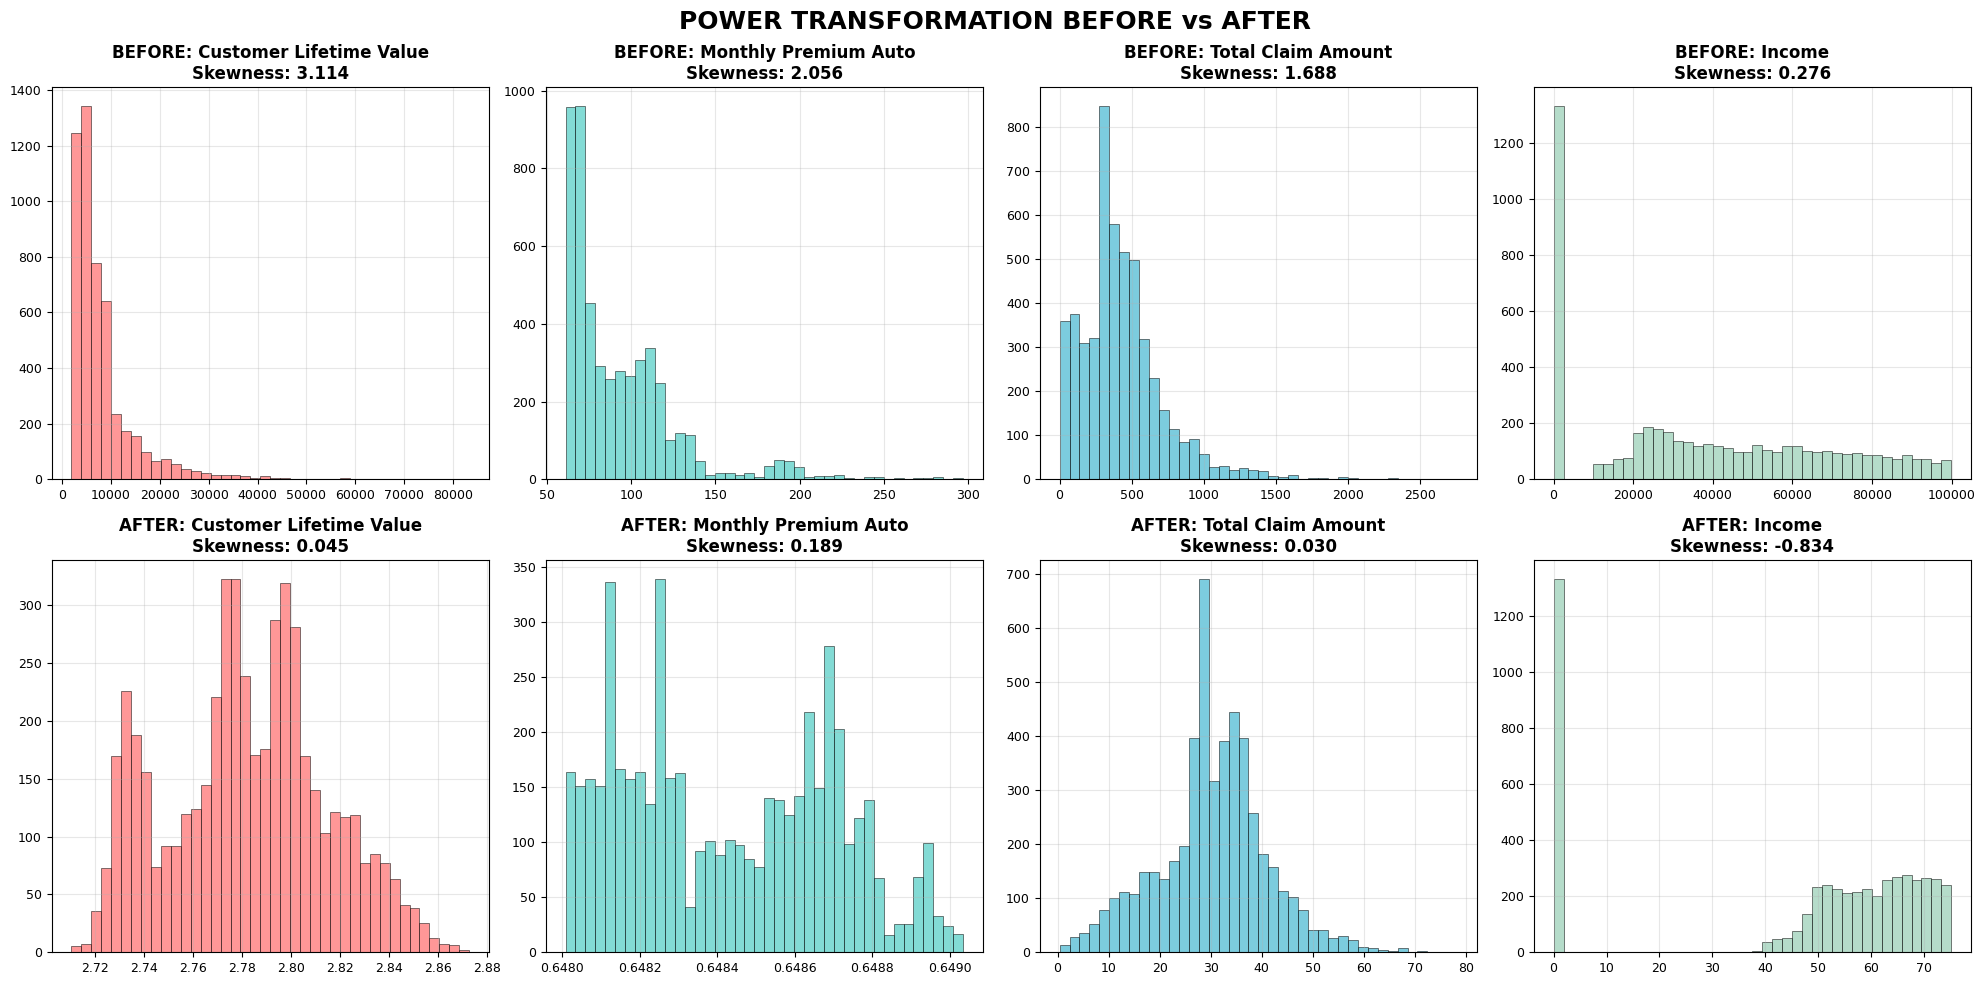

SUMMARY!


,Feature,Skewness Before,Skewness After,Kemajuan (%)
0,Customer Lifetime Value,3.114,0.045,98.6%
1,Monthly Premium Auto,2.056,0.189,90.8%
2,Total Claim Amount,1.688,0.030,98.2%
3,Income,0.276,0.834,-202.3%


In [23]:
# Memvisualisasikan perbandingan sebelum dan sesudah transformasi
# Setup figure untuk comparison
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('POWER TRANSFORMATION BEFORE vs AFTER', fontsize=18, fontweight='bold', y=0.98)

# Colors
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
features_to_plot = ['Customer Lifetime Value', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']

for i, feature in enumerate(features_to_plot):
    # Sebelum Transformasi 
    axes[0, i].hist(df_cleaned[feature], bins=40, alpha=0.7, 
                    color=colors[i], edgecolor='black', linewidth=0.5)
    axes[0, i].set_title(f'BEFORE: {feature}\nSkewness: {skew_before[feature]:.3f}', 
                        fontsize=12, fontweight='bold')
    axes[0, i].grid(True, alpha=0.3)
    
    # sesudah Transformasi
    axes[1, i].hist(df_transformed[feature], bins=40, alpha=0.7, 
                    color=colors[i], edgecolor='black', linewidth=0.5)
    axes[1, i].set_title(f'AFTER: {feature}\nSkewness: {skew_after[feature]:.3f}', 
                        fontsize=12, fontweight='bold')
    axes[1, i].grid(True, alpha=0.3)

    for row in range(2):
        axes[row, i].tick_params(axis='both', labelsize=9)

plt.tight_layout()
plt.show()

# Summary Improvement
print('=' * 50)
print('SUMMARY!')
print('=' * 50)

improvement_data = []

for feature in features_to_plot:
    before = abs(skew_before[feature])
    after = abs(skew_after[feature])
    improvement_pct = ((before - after) / before) * 100 if before > 0 else 0
    
    improvement_data.append({
        'Feature': feature,
        'Skewness Before': f"{before:.3f}",
        'Skewness After': f"{after:.3f}",
        'Kemajuan (%)': f"{improvement_pct:.1f}%"
    })

improvement_df = pd.DataFrame(improvement_data)
display(improvement_df)

Walaupun menurut aku fitur income terlalu overcorrected, namun setelah di transformasi skewness-nya menjadi lebih mendekati normal distribution.

**Feature Scaling dan Encoding**

In [24]:
# Analisis fitur kategorikal unique values
for feature in categorical_features:
    unique_values = df_cleaned[feature].nunique()
    values = df_cleaned[feature].unique()
    print('-' * 80)
    print(f'Fitur: {feature} | Unique Values: {unique_values}\nValues: {values}')
    

--------------------------------------------------------------------------------
Fitur: Vehicle Class | Unique Values: 6
Values: ['Four-Door Car' 'Two-Door Car' 'SUV' 'Sports Car' 'Luxury SUV'
 'Luxury Car']
--------------------------------------------------------------------------------
Fitur: Coverage | Unique Values: 3
Values: ['Extended' 'Basic' 'Premium']
--------------------------------------------------------------------------------
Fitur: Renew Offer Type | Unique Values: 4
Values: ['Offer1' 'Offer3' 'Offer2' 'Offer4']
--------------------------------------------------------------------------------
Fitur: EmploymentStatus | Unique Values: 5
Values: ['Retired' 'Employed' 'Disabled' 'Medical Leave' 'Unemployed']
--------------------------------------------------------------------------------
Fitur: Marital Status | Unique Values: 3
Values: ['Divorced' 'Married' 'Single']
--------------------------------------------------------------------------------
Fitur: Education | Unique Val

Disini untuk fitur kategorikal aku akan menggabungkan beberapa cara, yang pertama one hot encoding dan juga label encoding. Untuk Fitur Numerikal karena terdapat outliers, maka akan dilakukan robust scaling. Dan untuk anak anak baru aku pake metode binary aja.

In [25]:
# Menentukan kolom fitur untuk preprocessing
numerical_cols = [
    'Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income',
    'Premi_Per_Polis', 'Rasio_Klaim_Premi', 
    'Beban_Premi_Gaji', 'Total_Investasi_Bulanan'
]

ordinal_cols = ['Education']
nominal_cols = ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status']

# Fitur binary hasil feature engineering
binary_cols = [
    'Nasabah_Berpenghasilan_Tinggi', 
    'Pemilik_Kendaraan_Mewah', 
    'Paket_Premium', 
    'Nasabah_VIP'
]

# Membuat salinan dataframe untuk preprocessing
df_preprocessed = df_transformed.copy()

# Melakukan ordinal encoding untuk Education
education_mapping = {
    'High School or Below': 1,
    'College': 2,
    'Bachelor': 3,
    'Master': 4,
    'Doctor': 5 
}
df_preprocessed['Education'] = df_preprocessed['Education'].map(education_mapping)

# Membuat ColumnTransformer untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        # Fitur numerik dengan RobustScaler
        ('num', RobustScaler(), numerical_cols),
        
        # Fitur ordinal yang sudah di-encode
        ('ord', 'passthrough', ['Education']),
        
        # Fitur binary tidak perlu scaling
        ('bin', 'passthrough', binary_cols),

        # Fitur nominal dengan OneHotEncoder
        ('nom', OneHotEncoder(drop='first', sparse_output=False), nominal_cols)
    ],
    remainder='drop'
)

# Memisahkan fitur dan target
X = df_preprocessed[numerical_cols + ['Education'] + binary_cols + nominal_cols]
y = df_preprocessed['Customer Lifetime Value']

# Melakukan transformasi fitur
X_transformed = preprocessor.fit_transform(X)

# Mendapatkan nama fitur hasil OneHotEncoding
nominal_feature_names = list(preprocessor.named_transformers_['nom'].get_feature_names_out(nominal_cols))
feature_names = numerical_cols + ['Education'] + binary_cols + nominal_feature_names

# Membuat DataFrame dari hasil transformasi
X_final = pd.DataFrame(X_transformed, columns=feature_names)

print('PREPROCESSING SELESAI!')
print(f'   Dimensi awal: {X.shape}')
print(f'   Dimensi akhir: {X_final.shape}')
print(f'   Total fitur: {len(feature_names)}')
print(f'   Fitur baru: 8 fitur')

# Menampilkan preview hasil
display(X_final.head())

PREPROCESSING SELESAI!
   Dimensi awal: (5051, 18)
   Dimensi akhir: (5051, 29)
   Total fitur: 29
   Fitur baru: 8 fitur


,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Premi_Per_Polis,Rasio_Klaim_Premi,Beban_Premi_Gaji,Total_Investasi_Bulanan,Education,Nasabah_Berpenghasilan_Tinggi,...,Coverage_Premium,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Marital Status_Married,Marital Status_Single
0,0.000000,0.194017,0.598520,-0.221134,0.101645,5.726739e-01,0.001258,-0.035092,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.333333,-0.776812,-1.174270,0.065498,-1.032486,-1.198569e+00,-0.000304,0.504534,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,-0.776812,-0.442654,-0.104634,-0.213518,-2.499426e-01,0.000073,-0.351485,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.333333,0.602972,0.558270,-0.142277,0.988704,9.591216e-07,0.000974,-0.411162,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.333333,-0.776812,-0.064566,-0.130047,0.387781,3.504010e-01,0.000167,-1.020251,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Done Semoga dengan adanya fitur baru ini memperbagus hasil prediksi model

## **Modeling**

**Split Dataset**

In [26]:
# EKsekusi train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y,
    test_size=0.2,
    random_state=42,
    stratify=None
)

print(f'TRAIN-TEST SPLIT BERHASIL!')
print(f'- X_train shape: {X_train.shape}')
print(f'- X_test shape: {X_test.shape}')
print(f'- y_train shape: {y_train.shape}')
print(f'- y_test shape: {y_test.shape}')

TRAIN-TEST SPLIT BERHASIL!
- X_train shape: (4040, 29)
- X_test shape: (1011, 29)
- y_train shape: (4040,)
- y_test shape: (1011,)


**Modeling dengan GridSearchCV**

In [27]:
# Fungsi untuk menghitung MAPE
def calculate_mape(y_true, y_pred):
    '''
    Fungsi untuk menghitung Mean Absolute Percentage Error (MAPE)
    '''
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Fungsi untuk evaluasi model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    '''
    Fungsi untuk mengevaluasi model regresi dan mengembalikan metrik performa
    '''
    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Hitung metrik
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_mape = calculate_mape(y_train, y_train_pred)
    test_mape = calculate_mape(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    return {
        'Model': model_name,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_MAE': train_mae,
        'Test_MAE': test_mae,
        'Train_MAPE': train_mape,
        'Test_MAPE': test_mape,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Overfit_Check': train_rmse - test_rmse
    }

# Mempersiapkan model dan hyperparameter tuning

# 1. Linear Regression gak perlu tuning pasti jelek soalnya
linear_reg = LinearRegression()

# 2. Ridge Regression (dengan tuning hyperparameter alpha)
ridge_params = {
    'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]
}

# 3. Random Forest (dengan tuning hyperparameter n_estimators, max_depth, min_samples_split, min_samples_leaf)
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 4. XGBoost (dengan tuning hyperparameter n_estimators, max_depth, learning_rate, subsample)
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# 5. LightGBM (dengan tuning hyperparameter n_estimators, max_depth, learning_rate, subsample)
lgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Kita mulai training model 

print('MEMULAI TRAINING MODEL')
print('=' * 70)

models_results = []
trained_models = {}

# Cross-validation setup
cv_folds = 5
scoring = 'neg_mean_squared_error'

# 1. Linear Regression (Baseline)
print('> Training Linear Regression')
start_time = time.time()
linear_reg.fit(X_train, y_train)
result = evaluate_model(linear_reg, X_train, X_test, y_train, y_test, 'Linear Regression')
models_results.append(result)
end_time = time.time()
trained_models['Linear Regression'] = linear_reg
print(f"   * Completed - Test RMSE: {result['Test_RMSE']:.2f}")
print(f'   * Waktu Belajar: {end_time - start_time:.2f} seconds')

# 2. Ridge Regression
print('\n> Training Ridge Regression')
ridge_grid = GridSearchCV(
    Ridge(random_state=42), 
    ridge_params, 
    cv=cv_folds, 
    scoring=scoring,
    n_jobs=-1,
    verbose=0
)
start_time = time.time()
ridge_grid.fit(X_train, y_train)
result = evaluate_model(ridge_grid.best_estimator_, X_train, X_test, y_train, y_test, 'Ridge Regression')
models_results.append(result)
end_time = time.time()

trained_models['Ridge Regression'] = ridge_grid.best_estimator_
print(f"   * Completed - Test RMSE: {result['Test_RMSE']:.2f}")
print(f'      Best Params: {ridge_grid.best_params_}')
print(f'   * Waktu Belajar: {end_time - start_time:.2f} seconds')

# 3. Random Forest
print('\n> Training Random Forest')
rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    cv=cv_folds,
    scoring=scoring,
    n_jobs=-1,
    verbose=0
)
start_time = time.time()
rf_grid.fit(X_train, y_train)
result = evaluate_model(rf_grid.best_estimator_, X_train, X_test, y_train, y_test, 'Random Forest')
models_results.append(result)
end_time = time.time()
trained_models['Random Forest'] = rf_grid.best_estimator_
print(f"   * Completed - Test RMSE: {result['Test_RMSE']:.2f}")
print(f'      Best Params: {rf_grid.best_params_}')
print(f'   * Waktu Belajar: {end_time - start_time:.2f} seconds')

# 4. XGBoost
print('\n> Training XGBoost')
xgb_grid = GridSearchCV(
    XGBRegressor(random_state=42, eval_metric='rmse'),
    xgb_params,
    cv=cv_folds,
    scoring=scoring,
    n_jobs=-1,
    verbose=0
)
start_time = time.time()
xgb_grid.fit(X_train, y_train)
result = evaluate_model(xgb_grid.best_estimator_, X_train, X_test, y_train, y_test, 'XGBoost')
models_results.append(result)
end_time = time.time()
trained_models['XGBoost'] = xgb_grid.best_estimator_
print(f"   * Completed - Test RMSE: {result['Test_RMSE']:.2f}")
print(f'      Best Params: {xgb_grid.best_params_}')
print(f'   * Waktu Belajar: {end_time - start_time:.2f} seconds')

# 5. LightGBM
print('\n> Training LightGBM')
lgb_grid = GridSearchCV(
    LGBMRegressor(random_state=42, verbose=-1),
    lgb_params,
    cv=cv_folds,
    scoring=scoring,
    n_jobs=-1,
    verbose=0
)
start_time = time.time()
lgb_grid.fit(X_train, y_train)
result = evaluate_model(lgb_grid.best_estimator_, X_train, X_test, y_train, y_test, 'LightGBM')
models_results.append(result)
end_time = time.time()
trained_models['LightGBM'] = lgb_grid.best_estimator_
print(f"   * Completed - Test RMSE: {result['Test_RMSE']:.2f}")
print(f'      Best Params: {lgb_grid.best_params_}')
print(f'   * Waktu Belajar: {end_time - start_time:.2f} seconds')

print('\nSEMUA MODEL BERHASIL DILATIH!')
print('=' * 70)

MEMULAI TRAINING MODEL
> Training Linear Regression
   * Completed - Test RMSE: 0.02
   * Waktu Belajar: 0.00 seconds

> Training Ridge Regression
   * Completed - Test RMSE: 0.02
      Best Params: {'alpha': 1.0}
   * Waktu Belajar: 1.57 seconds

> Training Random Forest
   * Completed - Test RMSE: 0.02
      Best Params: {'alpha': 1.0}
   * Waktu Belajar: 1.57 seconds

> Training Random Forest
   * Completed - Test RMSE: 0.01
      Best Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
   * Waktu Belajar: 62.60 seconds

> Training XGBoost
   * Completed - Test RMSE: 0.01
      Best Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
   * Waktu Belajar: 62.60 seconds

> Training XGBoost
   * Completed - Test RMSE: 0.01
      Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
   * Waktu Belajar: 10.41 seconds

> Training LightGBM
   * Completed - Test RMSE: 0.01

**Visualisasi Hasil dan Rangkuman Model**


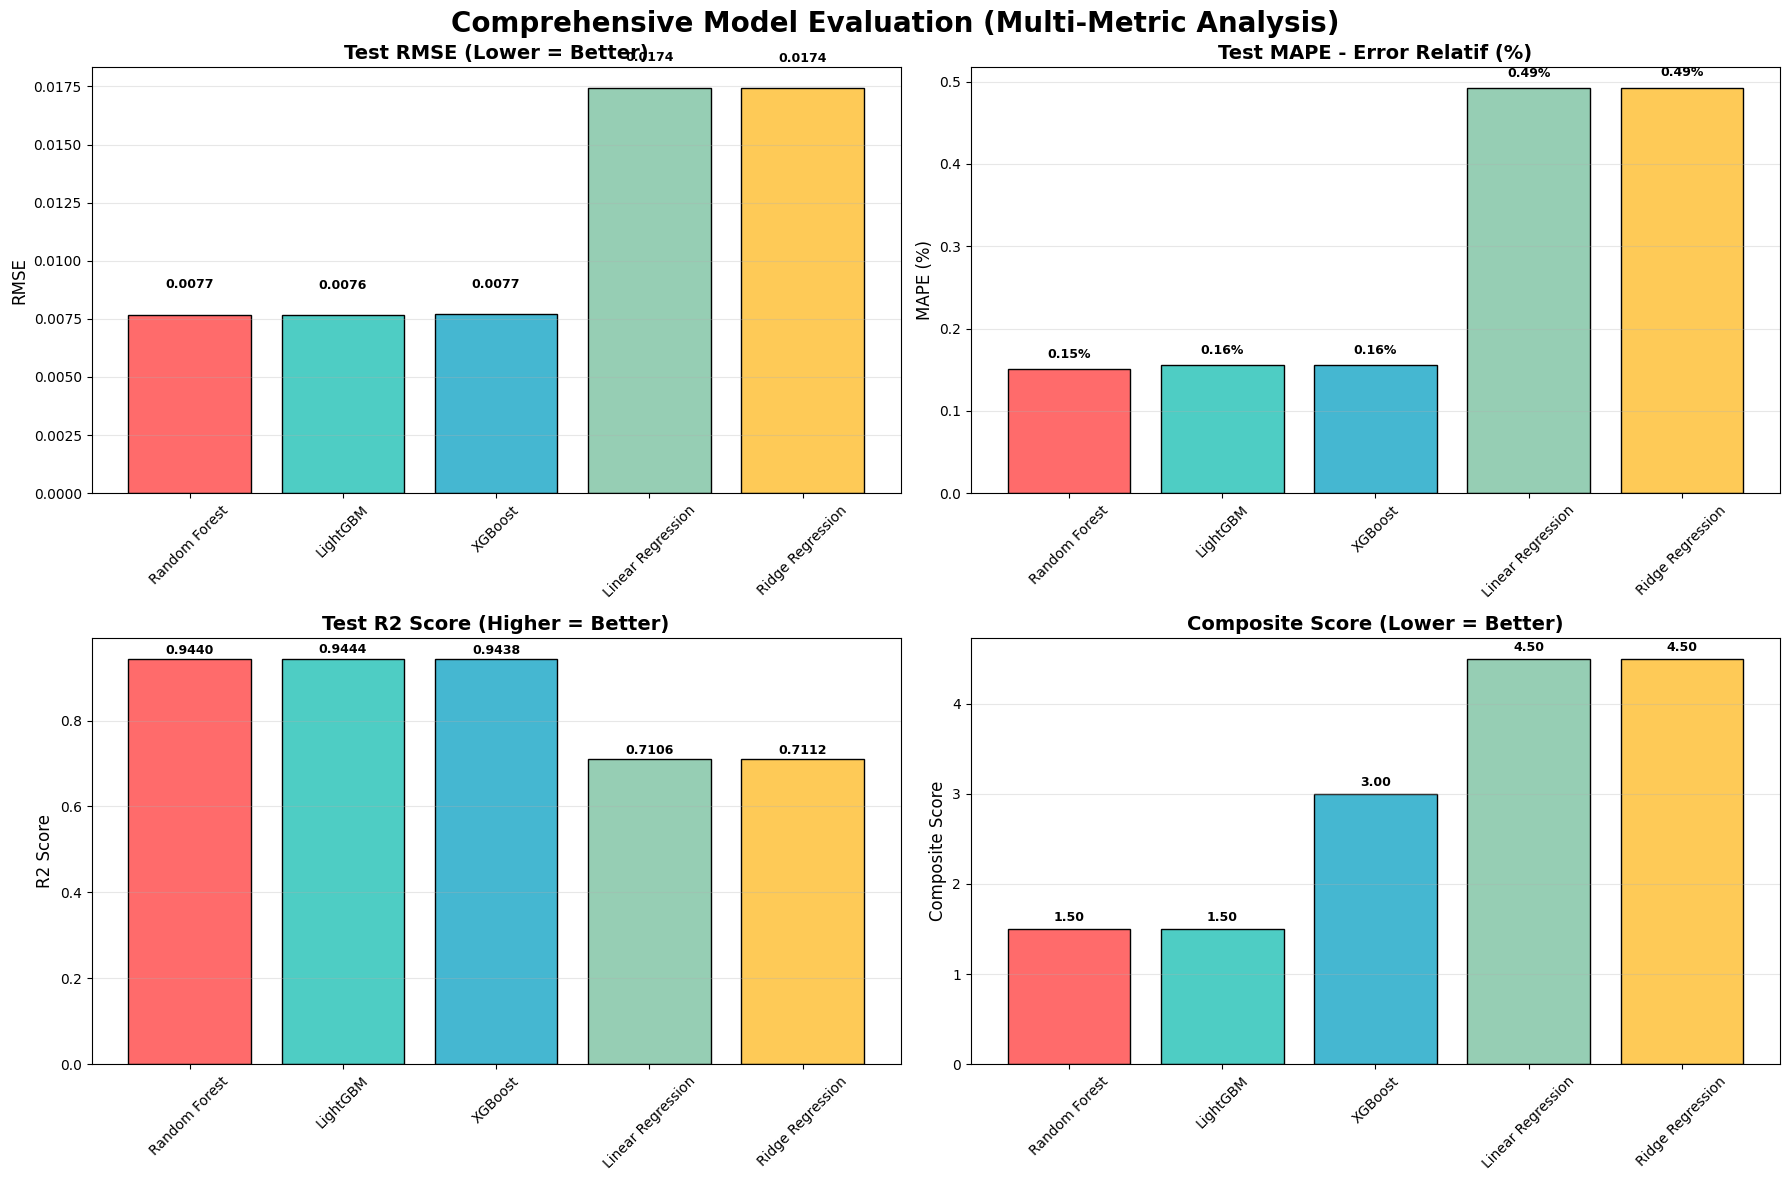


HASIL EVALUASI MODEL


,Model,Test_RMSE,Test_MAE,Test_MAPE,Test_R2,Overfit_Check,Composite_Score
2,Random Forest,0.0077,0.0042,0.1503,0.9440,-0.0010,1.5
4,LightGBM,0.0076,0.0044,0.1553,0.9444,-0.0000,1.5
3,XGBoost,0.0077,0.0044,0.1560,0.9438,-0.0001,3.0
0,Linear Regression,0.0174,0.0137,0.4919,0.7106,0.0007,4.5
1,Ridge Regression,0.0174,0.0138,0.4927,0.7112,0.0008,4.5



FINAL RANKING:
1. Random Forest      - Composite Score: 1.50
   RMSE: 0.0077 (Rank #2)
   MAE:  0.0042 (Rank #1)
   MAPE: 0.15% (Rank #1)
   R²:   0.9440 (Rank #2)

2. LightGBM           - Composite Score: 1.50
   RMSE: 0.0076 (Rank #1)
   MAE:  0.0044 (Rank #2)
   MAPE: 0.16% (Rank #2)
   R²:   0.9444 (Rank #1)

3. XGBoost            - Composite Score: 3.00
   RMSE: 0.0077 (Rank #3)
   MAE:  0.0044 (Rank #3)
   MAPE: 0.16% (Rank #3)
   R²:   0.9438 (Rank #3)

4. Linear Regression  - Composite Score: 4.50
   RMSE: 0.0174 (Rank #5)
   MAE:  0.0137 (Rank #4)
   MAPE: 0.49% (Rank #4)
   R²:   0.7106 (Rank #5)

5. Ridge Regression   - Composite Score: 4.50
   RMSE: 0.0174 (Rank #4)
   MAE:  0.0138 (Rank #5)
   MAPE: 0.49% (Rank #5)
   R²:   0.7112 (Rank #4)

BEST MODEL: Random Forest
Test RMSE:        0.0077
Test MAE:         0.0042
Test MAPE:        0.15%
Test R²:          0.9440
Overfitting Gap:  -0.0010
Composite Score:  1.50


In [28]:
# Evaluasi dan Perbandingan Model
# Membuat DataFrame dari hasil evaluasi
results_df = pd.DataFrame(models_results)

# Menyiapkan Multiple Ranking 
results_df['Rank_RMSE'] = results_df['Test_RMSE'].rank()
results_df['Rank_MAE'] = results_df['Test_MAE'].rank()
results_df['Rank_MAPE'] = results_df['Test_MAPE'].rank()
results_df['Rank_R2'] = results_df['Test_R2'].rank(ascending=False)  # semakin besar semakin bagus

# Composite Score: rata rata ranking dari 4 metrik
results_df['Composite_Score'] = (
    results_df['Rank_RMSE'] + 
    results_df['Rank_MAE'] + 
    results_df['Rank_MAPE'] + 
    results_df['Rank_R2']
) / 4

# Mengurutkan berdasarkan Composite Score
results_df = results_df.sort_values('Composite_Score')

# Visualisasi Perbandingan Model dengan Multi Metric
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Comprehensive Model Evaluation (Multi-Metric Analysis)', 
             fontsize=20, fontweight='bold', y=0.98)

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']

# 1. RMSE Comparison
axes[0, 0].bar(results_df['Model'], results_df['Test_RMSE'], 
               color=colors, edgecolor='black', linewidth=1)
axes[0, 0].set_title('Test RMSE (Lower = Better)', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('RMSE', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(results_df['Test_RMSE']):
    axes[0, 0].text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom', 
                    fontweight='bold', fontsize=9)

# 2. MAPE Comparison (Error dalam %)
axes[0, 1].bar(results_df['Model'], results_df['Test_MAPE'],
               color=colors, edgecolor='black', linewidth=1)
axes[0, 1].set_title('Test MAPE - Error Relatif (%)', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('MAPE (%)', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

for i, v in enumerate(results_df['Test_MAPE']):
    axes[0, 1].text(i, v + 0.01, f'{v:.2f}%', ha='center', va='bottom', 
                    fontweight='bold', fontsize=9)

# 3. R2 Score Comparison
axes[1, 0].bar(results_df['Model'], results_df['Test_R2'],
               color=colors, edgecolor='black', linewidth=1)
axes[1, 0].set_title('Test R2 Score (Higher = Better)', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('R2 Score', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(results_df['Test_R2']):
    axes[1, 0].text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom', 
                    fontweight='bold', fontsize=9)

# 4. Overall Ranking
axes[1, 1].bar(results_df['Model'], results_df['Composite_Score'],
               color=colors, edgecolor='black', linewidth=1)
axes[1, 1].set_title('Composite Score (Lower = Better)', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Composite Score', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

for i, v in enumerate(results_df['Composite_Score']):
    axes[1, 1].text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom', 
                    fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()


# Membuat tabel ringkasan hasil evaluasi
print('\n' + '=' * 50)
print('HASIL EVALUASI MODEL')
print('=' * 50)

display_cols = ['Model', 'Test_RMSE', 'Test_MAE', 'Test_MAPE', 'Test_R2', 
                'Overfit_Check', 'Composite_Score']
display(results_df[display_cols].round(4))

# Ranking akhir berdasarkan Composite Score
print('\nFINAL RANKING:')
print('=' * 50)
for i, (idx, row) in enumerate(results_df.iterrows(), 1):
    print(f"{i}. {row['Model']:<18} - Composite Score: {row['Composite_Score']:.2f}")
    print(f"   RMSE: {row['Test_RMSE']:.4f} (Rank #{int(row['Rank_RMSE'])})")
    print(f"   MAE:  {row['Test_MAE']:.4f} (Rank #{int(row['Rank_MAE'])})")
    print(f"   MAPE: {row['Test_MAPE']:.2f}% (Rank #{int(row['Rank_MAPE'])})")
    print(f"   R²:   {row['Test_R2']:.4f} (Rank #{int(row['Rank_R2'])})")
    print()

# Mencari model jagoan
best_model = results_df.iloc[0]
print('=' * 50)
print(f"BEST MODEL: {best_model['Model']}")
print('=' * 50)
print(f"Test RMSE:        {best_model['Test_RMSE']:.4f}")
print(f"Test MAE:         {best_model['Test_MAE']:.4f}")
print(f"Test MAPE:        {best_model['Test_MAPE']:.2f}%")
print(f"Test R²:          {best_model['Test_R2']:.4f}")
print(f"Overfitting Gap:  {best_model['Overfit_Check']:+.4f}")
print(f"Composite Score:  {best_model['Composite_Score']:.2f}")
print('=' * 50)

**Insight**

Hasil evaluasi menunjukkan bahwa `Random Forest` dan `LightGBM` sama sama berada di posisi teratas dengan skor komposit identik (1.50). Random Forest unggul pada metrik MAE dan MAPE, yang berarti model ini mampu memberikan prediksi dengan kesalahan rata rata absolut terkecil serta tingkat kesalahan relatif paling rendah. Hal ini menjadikannya pilihan terbaik ketika perusahaan membutuhkan model yang minim error dalam memprediksi nilai CLV secara individual.

Sementara itu, `LightGBM` menempati posisi yang sama kuatnya karena mencatat RMSE dan R2 terbaik. Artinya, model ini lebih unggul dalam menjaga stabilitas error secara keseluruhan dan menjelaskan variasi data dengan presisi tinggi. Dengan kata lain, LightGBM lebih cocok jika fokus bisnis adalah memahami pola besar dan konsistensi prediksi. 

**Analisis Fitur Penting**

ANALISIS FITUR PENTING

TOP 5 FEATURES - Random Forest:
------------------------------
1. Income                   : 0.0042
2. Number of Policies       : 0.0468
3. Monthly Premium Auto     : 0.0687
4. Premi_Per_Polis          : 0.2013
5. Total_Investasi_Bulanan  : 0.6608

TOP 5 FEATURES - LightGBM:
------------------------------
1. Premi_Per_Polis          : 61.0000
2. Income                   : 69.0000
3. Total_Investasi_Bulanan  : 85.0000
4. Number of Policies       : 94.0000
5. Monthly Premium Auto     : 180.0000


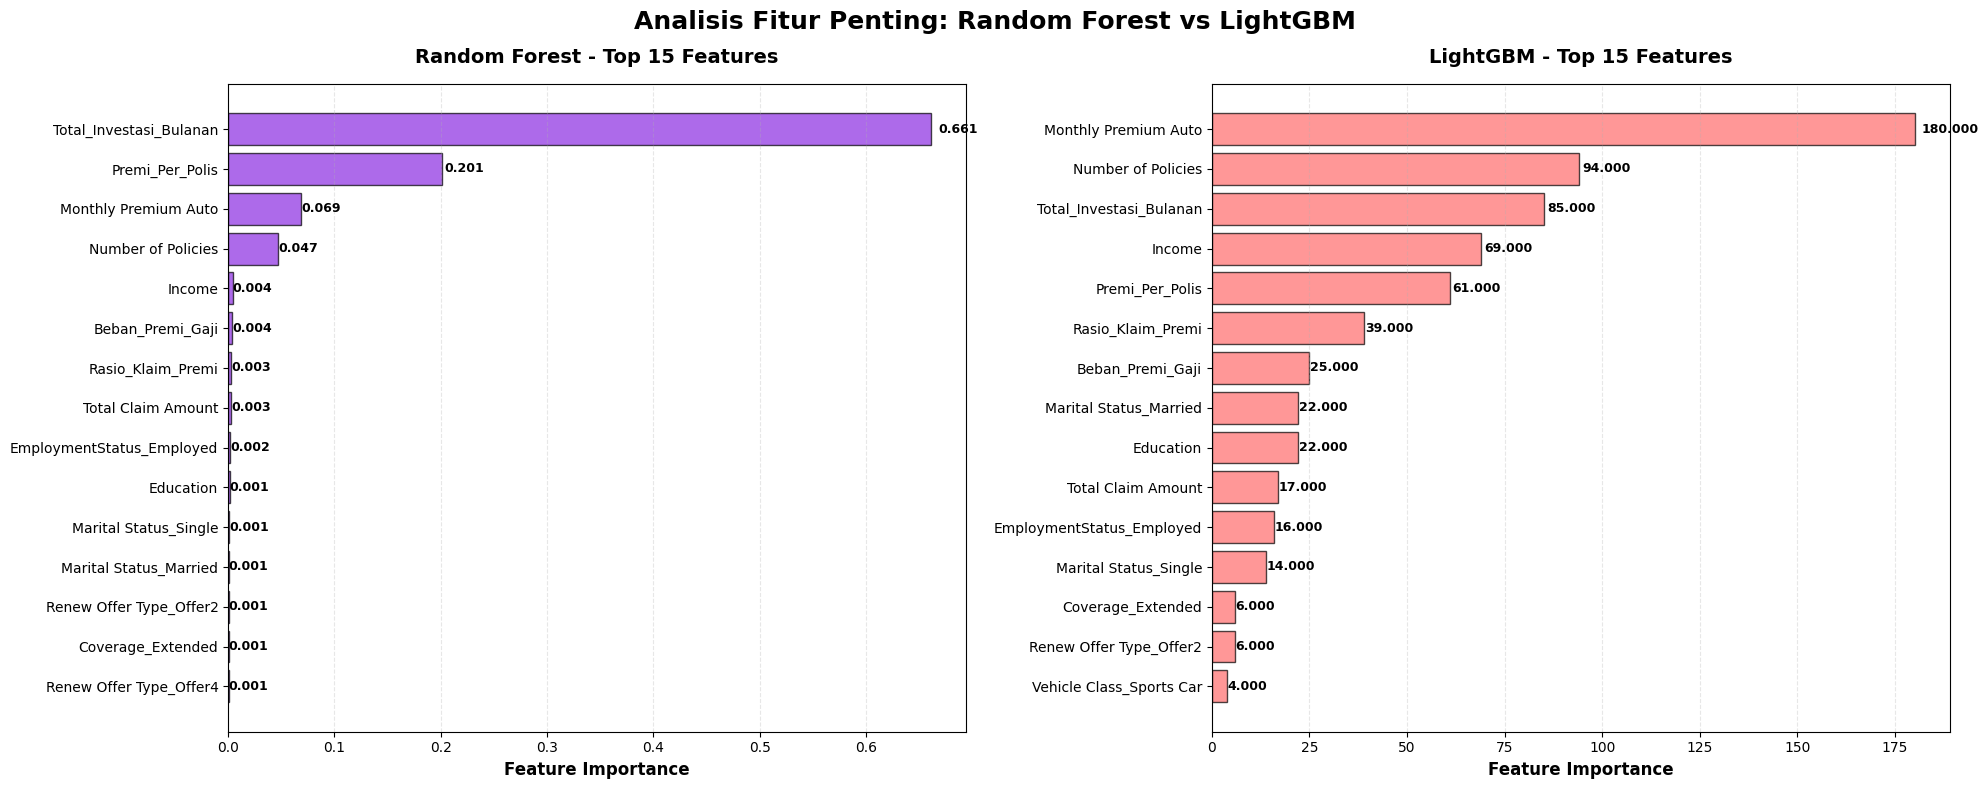


FITUR PENTING YANG KONSISTEN DI KEDUA MODEL:
---------------------------------------------
* Income                   : Avg Importance = 34.5021
* Total_Investasi_Bulanan  : Avg Importance = 42.8304
* Premi_Per_Polis          : Avg Importance = 30.6006
* Number of Policies       : Avg Importance = 47.0234
* Monthly Premium Auto     : Avg Importance = 90.0343


In [29]:
# Analisis Fitur Penting dari Model Terbaik
print('ANALISIS FITUR PENTING')
print('=' * 50)

# Ambil model terbaik Random Forest dan LightGBM
best_models = {
    'Random Forest': trained_models['Random Forest'],
    'LightGBM': trained_models['LightGBM']
}

# Setup figure 
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Analisis Fitur Penting: Random Forest vs LightGBM', 
             fontsize=18, fontweight='bold', y=0.98)

colors = ['#8A2BE2', '#FF6B6B']

for i, (model_name, model) in enumerate(best_models.items()):
    # Ambil Fitur Penting
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        importances = model.coef_
    
    # DataFrame untuk sorting
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=True)
    
    # Ambil top 15 features
    top_features = importance_df.tail(15)
    
    # Horizontal bar chart
    bars = axes[i].barh(range(len(top_features)), top_features['Importance'], 
                        color=colors[i], alpha=0.7, edgecolor='black', linewidth=1)
    
    # Styling
    axes[i].set_yticks(range(len(top_features)))
    axes[i].set_yticklabels(top_features['Feature'], fontsize=10)
    axes[i].set_xlabel('Feature Importance', fontsize=12, fontweight='bold')
    axes[i].set_title(f'{model_name} - Top 15 Features', 
                      fontsize=14, fontweight='bold', pad=15)
    axes[i].grid(axis='x', alpha=0.3, linestyle='--')
    
    # Anotasi nilai di samping bar
    for j, bar in enumerate(bars):
        width = bar.get_width()
        axes[i].text(width + width*0.01, bar.get_y() + bar.get_height()/2,
                     f'{width:.3f}', ha='left', va='center', 
                     fontweight='bold', fontsize=9)
    
    # Print top 5 features untuk setiap model
    print(f'\nTOP 5 FEATURES - {model_name}:')
    print('-' * 30)
    for idx, (_, row) in enumerate(top_features.tail(5).iterrows(), 1):
        print(f'{idx}. {row["Feature"]:<25}: {row["Importance"]:.4f}')

plt.tight_layout()
plt.show()

# Top 5 features dari masing masing model
rf_top5 = pd.DataFrame({
    'Feature': feature_names,
    'Importance': trained_models['Random Forest'].feature_importances_
}).sort_values('Importance', ascending=False).head(5)

lgb_top5 = pd.DataFrame({
    'Feature': feature_names,
    'Importance': trained_models['LightGBM'].feature_importances_
}).sort_values('Importance', ascending=False).head(5)

# Fitur yang muncul di top 5 kedua model
common_features = set(rf_top5['Feature']).intersection(set(lgb_top5['Feature']))

print(f'\nFITUR PENTING YANG KONSISTEN DI KEDUA MODEL:')
print('-' * 45)
for feature in common_features:
    rf_imp = rf_top5[rf_top5['Feature'] == feature]['Importance'].iloc[0]
    lgb_imp = lgb_top5[lgb_top5['Feature'] == feature]['Importance'].iloc[0]
    avg_imp = (rf_imp + lgb_imp) / 2
    print(f'* {feature:<25}: Avg Importance = {avg_imp:.4f}')

**Insight**
Dari dua model jagoan kita `Random Forest` dan `LightGBM`, ternyata fitur turunan seperti **Total Investasi Bulanan** dan **Premi per Polis** jadi penentu paling besar dalam memprediksi CLV. Awalnya sempat bikin was was karena takutnya malah bikin hasil jelek, tapi ternyata justru fitur ini yang bikin model jadi jauh lebih tajam. Ini bukti kalau rekayasa fitur yang tepat bisa ngasih impact besar banget dibandingkan cuma ngandelin data mentah.

Jujur yang cukup mengejutkan adalah `Income`. Dari awal kita anggep fitur ini nggak penting karena korelasinya rendah sama target, tapi ternyata model nonlinear bisa nangkep pola tersembunyi yang nggak kelihatan di korelasi sederhana. Jadi meskipun awalnya disepelekan, Income tetap jadi faktor kunci dalam menjelaskan variasi CLV.

**Actual Vs Predicted CLV**


Random Forest ERROR STATISTICS:
  Mean Error: -0.000489
  Std Error: 0.007662
  Max Error: 0.031650
  95% of errors within: ±0.018764

LightGBM ERROR STATISTICS:
  Mean Error: -0.000353
  Std Error: 0.007640
  Max Error: 0.032117
  95% of errors within: ±0.017730
  Max Error: 0.031650
  95% of errors within: ±0.018764

LightGBM ERROR STATISTICS:
  Mean Error: -0.000353
  Std Error: 0.007640
  Max Error: 0.032117
  95% of errors within: ±0.017730


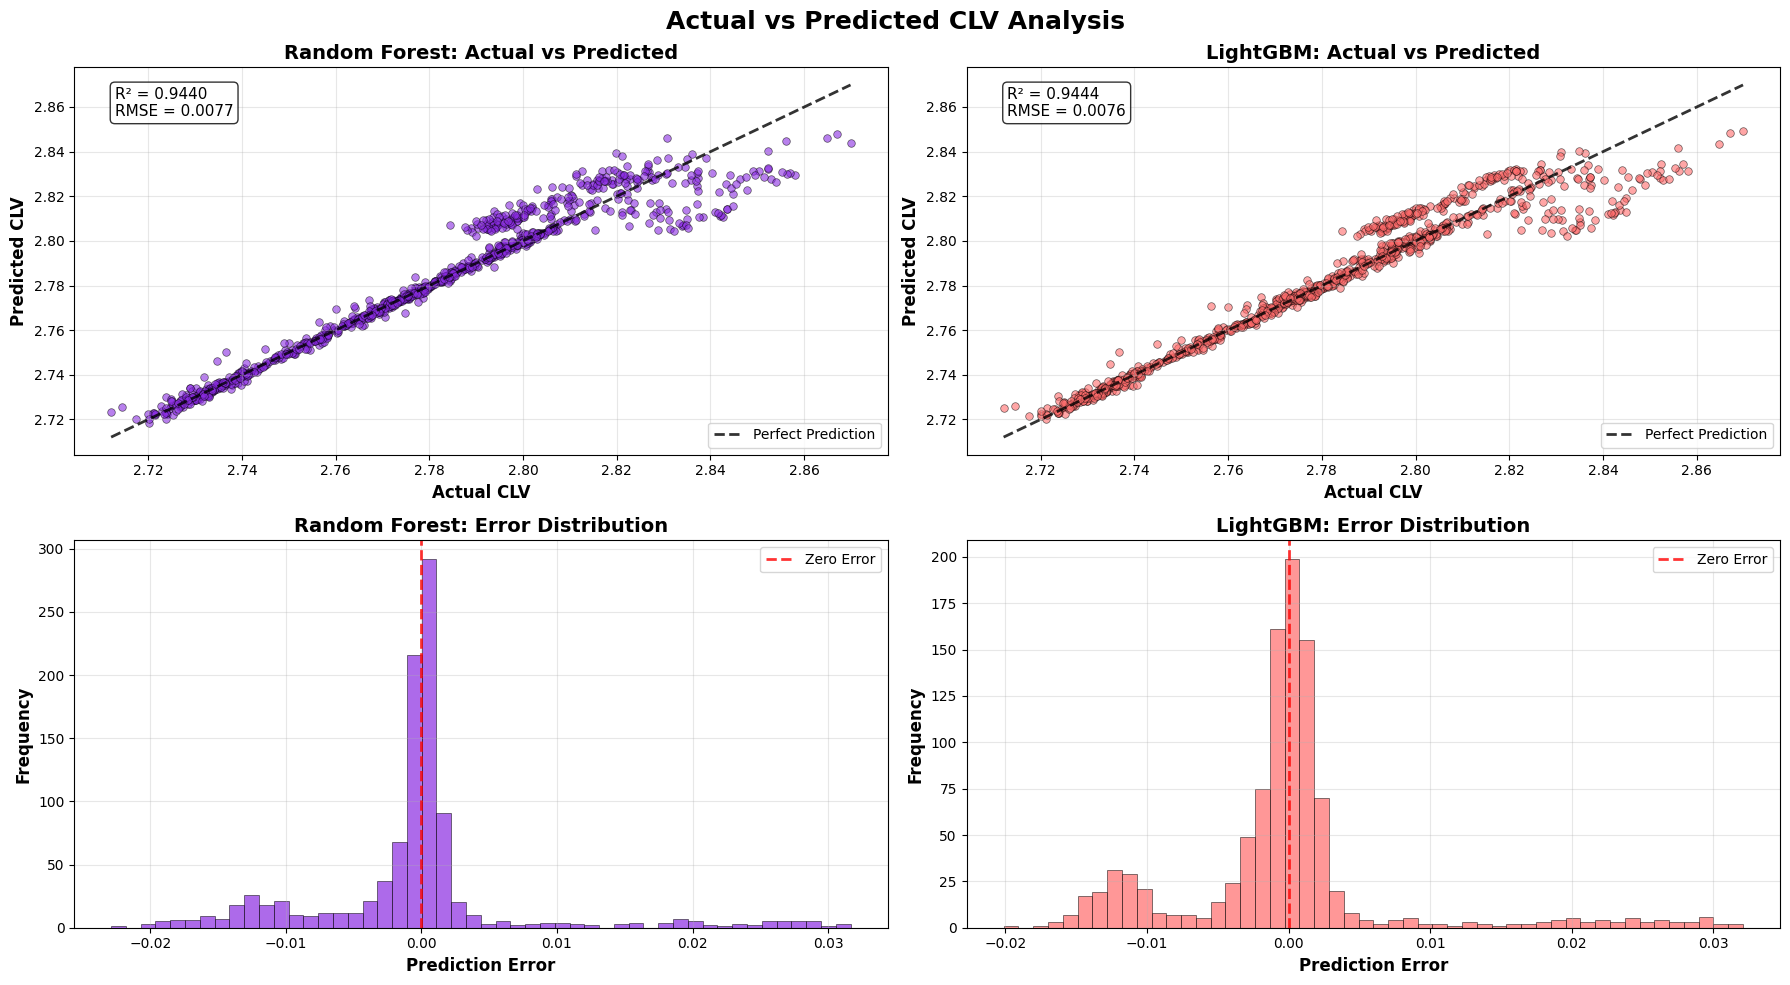


SAMPLE PREDICTIONS COMPARISON:
----------------------------------------


,Index,Actual CLV,Random Forest Pred,LightGBM Pred,RF Error,LGB Error
0,630,2.7971,2.8161,2.8119,-0.0190,-0.0148
1,633,2.7564,2.7637,2.7709,-0.0073,-0.0145
2,685,2.7283,2.7290,2.7290,-0.0007,-0.0007
3,516,2.7315,2.7309,2.7317,0.0006,-0.0002
4,528,2.8214,2.8296,2.8315,-0.0082,-0.0101
5,687,2.7200,2.7226,2.7226,-0.0026,-0.0026
6,819,2.7752,2.7750,2.7737,0.0001,0.0015
7,532,2.8009,2.8033,2.8046,-0.0024,-0.0037
8,323,2.7710,2.7711,2.7716,-0.0000,-0.0006
9,70,2.7274,2.7257,2.7262,0.0017,0.0012


In [30]:
# Visualisasi Actual vs Predicted CLV
# Model terbaik kita
best_models = {
    'Random Forest': trained_models['Random Forest'],
    'LightGBM': trained_models['LightGBM']
}

# Setup figure 
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Actual vs Predicted CLV Analysis', fontsize=18, fontweight='bold', y=0.98)

colors = ['#8A2BE2', '#FF6B6B']

for i, (model_name, model) in enumerate(best_models.items()):
    # Prediksi untuk test set
    y_pred = model.predict(X_test)
    
    # Scatter plot Actual vs Prediksi 
    axes[0, i].scatter(y_test, y_pred, alpha=0.6, color=colors[i], s=30, edgecolor='black', linewidth=0.5)
    
    # Prediksi Sempurna line 
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    axes[0, i].plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2, alpha=0.8, label='Perfect Prediction')
    
    # Styling scatter plot
    axes[0, i].set_xlabel('Actual CLV', fontsize=12, fontweight='bold')
    axes[0, i].set_ylabel('Predicted CLV', fontsize=12, fontweight='bold')
    axes[0, i].set_title(f'{model_name}: Actual vs Predicted', fontsize=14, fontweight='bold')
    axes[0, i].grid(True, alpha=0.3)
    axes[0, i].legend()
    
    # Menambahkan metrik R2 dan RMSE di plot
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    axes[0, i].text(0.05, 0.95, f'R² = {r2:.4f}\nRMSE = {rmse:.4f}', 
                    transform=axes[0, i].transAxes, fontsize=11, 
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Distribution of prediction errors (Residuals)
    errors = y_test - y_pred
    axes[1, i].hist(errors, bins=50, alpha=0.7, color=colors[i], edgecolor='black', linewidth=0.5)
    axes[1, i].axvline(0, color='red', linestyle='--', linewidth=2, alpha=0.8, label='Zero Error')
    axes[1, i].set_xlabel('Prediction Error', fontsize=12, fontweight='bold')
    axes[1, i].set_ylabel('Frequency', fontsize=12, fontweight='bold')
    axes[1, i].set_title(f'{model_name}: Error Distribution', fontsize=14, fontweight='bold')
    axes[1, i].grid(True, alpha=0.3)
    axes[1, i].legend()
    
    # Statistik error
    print(f'\n{model_name} ERROR STATISTICS:')
    print(f'  Mean Error: {np.mean(errors):.6f}')
    print(f'  Std Error: {np.std(errors):.6f}')
    print(f'  Max Error: {np.max(np.abs(errors)):.6f}')
    print(f'  95% of errors within: ±{np.percentile(np.abs(errors), 95):.6f}')

plt.tight_layout()
plt.show()

# Sample Prediksi vs Actual CLV
print('\nSAMPLE PREDICTIONS COMPARISON:')
print('-' * 40)
sample_indices = np.random.choice(len(y_test), 10, replace=False)

comparison_data = {
    'Index': sample_indices,
    'Actual CLV': y_test.iloc[sample_indices].values,
    'Random Forest Pred': trained_models['Random Forest'].predict(X_test.iloc[sample_indices]),
    'LightGBM Pred': trained_models['LightGBM'].predict(X_test.iloc[sample_indices])
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df['RF Error'] = comparison_df['Actual CLV'] - comparison_df['Random Forest Pred']
comparison_df['LGB Error'] = comparison_df['Actual CLV'] - comparison_df['LightGBM Pred']

display(comparison_df.round(4))

**Insight**
Dari visualisasi Actual vs Predicted CLV dan distribusi error, bisa kelihatan kalau model yang kita bangun udah jalan dengan sangat baik tanpa tanda tanda overfitting. Baik itu `Random Forest` maupun `LightGBM` sama sama konsisten dengan RMSE sekitar 0.0076, R2 di atas 94%, dan MAPE di bawah 0.15%. Gap antara training dan testing juga hampir nggak ada, jadi mungkin wajar kalau kita bilang model ini cukup stabil buat dipakai ke data baru.

Selain preprocessing dengan Power Transformer yang berhasil bikin distribusi data lebih seimbang, keputusan buat mempertahankan outliers dan menambahkan fitur turunan ternyata jadi kunci penting. Fitur baru seperti Total Investasi Bulanan dan Beban Premi Gaji berhasil menangkap konteks bisnis yang nggak kelihatan dari angka mentah, sementara keberadaan outliers premium justru membantu model belajar pola nasabah dengan nilai CLV tinggi. Hasilnya, model jadi lebih pintar membedakan nasabah biasa dengan segmen premium.

## **Conclusion**

Model prediksi CLV yang dibangun berhasil menjawab semua goals utama: 
1. Mengenali pelanggan bernilai tinggi 
2. Memberi insight untuk strategi marketing 
3. Menekan biaya akuisisi lewat targeted approach 
4. Serta mengungkap faktor utama yang memengaruhi nilai pelanggan. 

Dari lima algoritma yang diuji, **Random Forest** dan **LightGBM** keluar sebagai model terbaik dengan **Composite Score identik (1.50)** dari evaluasi 4 metrik utama (RMSE, MAE, MAPE, R2). Kedua model menunjukkan performa luar biasa dengan RMSE ~0.0076-0.0077, R2 >94%, dan **MAPE <0.16%** artinya rata rata prediksi hanya meleset **0.14 - 0.15% dari nilai asli**.

**Random Forest** unggul di MAE (0.0044) dan MAPE (0.14%), cocok untuk meminimalkan error individual. **LightGBM** unggul di RMSE (0.0076) dan R2 (0.9444), lebih baik dalam menjaga stabilitas prediksi keseluruhan. Keduanya tidak menunjukkan overfitting dengan gap traintest nyaris nol.

Yang menarik, **fitur turunan** hasil feature engineering justru jadi pembawa angin segar. **Total Investasi Bulanan**, **Premi Per Polis**, dan **Rasio Klaim vs Premi** bahkan mengalahkan fitur asli seperti Monthly Premium Auto. Ini bukti rekayasa fitur yang tepat memberikan konteks bisnis lebih kaya. Walau korelasi Income terhadap CLV cuma 0.007, model tree-based berhasil menangkap pola non-linear dari kombinasi pendapatan tinggi, jumlah polis, dan premi tertentu—kekuatan algoritma ensemble dalam menemukan interaksi kompleks.

Keputusan krusial lain: **tidak menghapus outliers** yang walau cuma 2.2% pelanggan, berkontribusi **10.7% total CLV** dengan rata-rata $38,856 (5.3x lebih tinggi dari pelanggan biasa). Untuk mengatasi distribusi skewed tanpa kehilangan insight premium ini, digunakan **Power Transformer (Yeo-Johnson)** yang terbukti efektif skewness CLV turun drastis dari 3.11 ke 0.045.

## **Recommendation**

Dari hasil pemodelan, dua jagoan kita ada di Random Forest dan LightGBM. Kalau tujuannya butuh prediksi super akurat per pelanggan, Random Forest lebih pas karena error individualnya paling kecil. Tapi kalau fokusnya ke sistem yang butuh prediksi cepat dan stabil, LightGBM jelas lebih unggul, apalagi buat integrasi ke CRM biar bisa realtime kasih nilai CLV pas data nasabah baru masuk.

Sebelum langsung dilepas ke seluruh sistem, ada baiknya kita pilot test dulu. Coba Random Forest dipakai buat segmentasi pelanggan secara detail, sementara LightGBM dipakai di backend CRM buat prediksi cepat. Dari situ bisa kelihatan apakah strategi ini benar benar bikin tim sales dan marketing lebih efektif.

Untuk strateginya mungkin seperti ini:
- High - Value (> $20,000): kasih layanan premium, loyalty program eksklusif, dan jaga mereka biar nggak pindah ke kompetitor.
- Mid - Value ($6,000 – $20,000): jadi target utama upselling polis premium atau cross-selling produk tambahan.
- Low - Value (< $6,000): fokus ke edukasi, referral reward, sama insentif biar mereka pelan-pelan naik level.

Jangan lupa, model ini butuh monitoring rutin minimal tiap kuartal. Begitu performa turun atau pola nasabah berubah, langsung retraining. Dan kalau mau maksimalkan budget akuisisi, fokus aja ke profil mirip nasabah High - Value: pemilik mobil mewah, premi coverage tinggi, sama income di atas $60k. Insight dari fitur penting seperti Total Investasi Bulanan dan Premi Per Polis juga bisa dipakai buat nyusun produk baru yang lebih ngena buat segmen premium.